<a href="https://colab.research.google.com/github/p3dr0id/covid19oesteba/blob/main/covid19_municipios_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados da Covid-19 nos municípios da macrorregião do oeste da Bahia**



*   Implementação das comparações entre previsões
*   Geração de tabela com os dados de previsão para serem inseridos no Boletim
*   Usando dados da tabela nova que foi pré-processada









# Tratamento e análise de dados

## Coleta e tratamento dos dados

### Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # importando a biblioteca matiplotlib para geração de gráficos
from matplotlib.ticker import MaxNLocator, AutoMinorLocator, FormatStrFormatter# para forçar que os valores do eixo sejam apenas números inteiros
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # serve para fazer inserção de gráficos como subplots
import datetime
import pytz
import time
from google.colab import drive, auth
from oauth2client.client import GoogleCredentials
!pip install gspread_pandas==3.0.0
import gspread

  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


### Importa dados do google drive e cria dataframes

In [ ]:
# Importa planilha de dados diretamente do google drive com a biblioteca gspread e cria um dataframe com a biblioteca pandas
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1KcTYpDBnYSchsPHAw-MYDZJQXMDDowJG0cBPR3JDyKE/edit?usp=sharing') # A URL of your workbook.
drive.mount('drive', force_remount=True) # Monta meu google drive para salvar os dataframes e figuras
sheet1 = wb.worksheet('Casos Acumulados') # Enter your sheet name.
sheet2 = wb.worksheet('Óbitos Acumulados') # Enter your sheet name.
sheet3 = wb.worksheet('Ativos') # Enter your sheet name.
sheet4 = wb.worksheet('Recuperados') # Enter your sheet name.
sheet5 = wb.worksheet('Ocupação de Leitos') # Enter your sheet name.
df1 = sheet1.get_all_values()
df2 = sheet2.get_all_values()
df3 = sheet3.get_all_values()
df4 = sheet4.get_all_values()
df5 = sheet5.get_all_values()
df_casos = pd.DataFrame(df1)
df_obitos = pd.DataFrame(df2)
df_ativos = pd.DataFrame(df3)
df_recuperados = pd.DataFrame(df4)
df_leitos = pd.DataFrame(df5)

Mounted at drive


### Visualização do dataframe criado a partir da planilha do GTG-Covid-19 UFOB

In [ ]:
df_casos.head(37)

0           1    ...         698         699
0                    Cidade  2020-03-21  ...  2022-02-16  2022-02-17
1                   Angical           0  ...        1044        1046
2               Baianópolis           0  ...        1287        1287
3                     Barra           0  ...        3856        3868
4                 Barreiras           1  ...       22980       23149
5         Bom Jesus da Lapa           0  ...        7213        7217
6               Brejolândia           0  ...         214         214
7        Brotas de Macaúbas           0  ...         897         904
8                Buritirama           0  ...        1338        1341
9                 Canápolis           0  ...         717         717
10               Catolândia           0  ...         375         377
11                    Cocos           0  ...        1915        1955
12                   Coribe           0  ...        1255        1257
13               Correntina           0  ...        4525        4534
14                 Cotegipe           0  ...        1012        1016
15              Cristópolis           0  ...        1130        1138
16     Formosa do Rio Preto           0  ...        2012        2024
17                Ibotirama           0  ...        2239        2239
18                 Ipupiara           0  ...         618         618
19                Jaborandi           0  ...        1078        1080
20   Luís Eduardo Magalhães           0  ...       18696       18696
21                 Mansidão           0  ...         526         526
22                  Morpará           0  ...         526         526
23  Muquém do São Francisco           0  ...         702         702
24   Oliveira dos Brejinhos           0  ...        1834        1848
25                Paratinga           0  ...        1907        1910
26        Riachão das Neves           0  ...        1602        1605
27   Santa Maria da Vitória           0  ...        4290        4295
28     Santa Rita de Cássia           0  ...        3298        3307
29                  Santana           0  ...        1675        1682
30            São Desidério           0  ...        4200        4267
31      São Félix do Coribe           0  ...        1591        1598
32         Serra do Ramalho           0  ...        1506        1508
33            Serra Dourada           0  ...         915         917
34            Sítio do Mato           0  ...         293         293
35   Tabocas do Brejo Velho           0  ...         554         556
36                Wanderley           0  ...        1312        1313

[37 rows x 700 columns]

In [ ]:
df_obitos.head(37)

0           1    ...         648         649
0                    Cidade  2020-05-10  ...  2022-02-16  2022-02-17
1                   Angical           0  ...          20          20
2               Baianópolis           0  ...          22          22
3                     Barra           0  ...          63          63
4                 Barreiras           0  ...         341         342
5         Bom Jesus da Lapa           0  ...         102         102
6               Brejolândia           0  ...          12          12
7        Brotas de Macaúbas           0  ...           7           7
8                Buritirama           0  ...          22          22
9                 Canápolis           0  ...          11          11
10               Catolândia           0  ...           1           1
11                    Cocos           0  ...          24          24
12                   Coribe           0  ...          16          16
13               Correntina           0  ...          72          72
14                 Cotegipe           0  ...          30          30
15              Cristópolis           1  ...           9           9
16     Formosa do Rio Preto           0  ...          34          34
17                Ibotirama           0  ...          54          54
18                 Ipupiara           0  ...           7           7
19                Jaborandi           0  ...          17          17
20   Luís Eduardo Magalhães           0  ...         142         142
21                 Mansidão           0  ...           9           9
22                  Morpará           0  ...          11          11
23  Muquém do São Francisco           0  ...           9           9
24   Oliveira dos Brejinhos           0  ...          20          20
25                Paratinga           0  ...          34          34
26        Riachão das Neves           0  ...          46          46
27   Santa Maria da Vitória           0  ...          71          71
28     Santa Rita de Cássia           0  ...          43          44
29                  Santana           0  ...          38          38
30            São Desidério           0  ...          50          50
31      São Félix do Coribe           0  ...          33          33
32         Serra do Ramalho           0  ...          42          42
33            Serra Dourada           0  ...          21          21
34            Sítio do Mato           0  ...          13          13
35   Tabocas do Brejo Velho           0  ...          12          12
36                Wanderley           0  ...          31          31

[37 rows x 650 columns]

### Seleção e pré-processamento dos dados de casos e óbitos acumulados

In [ ]:
# seleciona a região da planilha correspondente aos dados de casos e de óbitos acumulados da macrorregião

fim_col_casos = df_casos.columns[-1] # Valor alterado semanalmente
inicio_lin_casos = 1
fim_lin_casos = 36
fim_col_obitos = df_obitos.columns[-1]
inicio_lin_obitos = 1
fim_lin_obitos = 36

## para selecionar uma data específica descomente as três linhas abaixo
#data_escolhida = '2022-02-14'
#fim_col_casos = df_casos.iloc[0,:][df_casos.iloc[0,:] == data_escolhida].index.values[0] # busca o valor do indice a partir de uma data
#fim_col_obitos = df_obitos.iloc[0,:][df_obitos.iloc[0,:] == data_escolhida].index.values[0]
## para selecionar uma data específica descomente as três linhas acima

casos_acumulados = df_casos.loc[inicio_lin_casos:fim_lin_casos,1:fim_col_casos].copy()
obitos_acumulados = df_obitos.loc[inicio_lin_obitos:fim_lin_obitos,1:fim_col_obitos].copy()

casos_acumulados = casos_acumulados.reset_index(drop=True).copy() #reseta índices
casos_acumulados = casos_acumulados.T.reset_index(drop=True).copy() #transpõe o dataframe onde as colunas passam ser as cidades e as linhas os dias
obitos_acumulados = obitos_acumulados.reset_index(drop=True).copy() 
obitos_acumulados = obitos_acumulados.T.reset_index(drop=True).copy()

# Remove espaços, pontos e converte valores para números inteiros
for col in casos_acumulados.columns:
  casos_acumulados[col] = casos_acumulados[col].astype(str).str.strip()
  casos_acumulados[col] = casos_acumulados[col].str.replace('\.','').astype(int)
for col in obitos_acumulados.columns:
  obitos_acumulados[col] = obitos_acumulados[col].astype(str).str.strip()
  obitos_acumulados[col] = obitos_acumulados[col].str.replace('\.','').astype(int)

casos_ac = casos_acumulados.copy()
obitos_ac = obitos_acumulados.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: The default value of regex will change from True to False in a future version.


## Criação de dataframes para os casos/óbitos acumulados e novos de todas as cidades

### Criando dataframes com séries temporais

In [ ]:
cidades = df_casos.loc[inicio_lin_casos:fim_lin_casos,0].str.strip().copy() # seleciona coluna com as cidades da macrorregião e remove espaços
cidades = cidades.reset_index(drop=True).copy( ) # reseta os índices
cidades

0                     Angical
1                 Baianópolis
2                       Barra
3                   Barreiras
4           Bom Jesus da Lapa
5                 Brejolândia
6          Brotas de Macaúbas
7                  Buritirama
8                   Canápolis
9                  Catolândia
10                      Cocos
11                     Coribe
12                 Correntina
13                   Cotegipe
14                Cristópolis
15       Formosa do Rio Preto
16                  Ibotirama
17                   Ipupiara
18                  Jaborandi
19     Luís Eduardo Magalhães
20                   Mansidão
21                    Morpará
22    Muquém do São Francisco
23     Oliveira dos Brejinhos
24                  Paratinga
25          Riachão das Neves
26     Santa Maria da Vitória
27       Santa Rita de Cássia
28                    Santana
29              São Desidério
30        São Félix do Coribe
31           Serra do Ramalho
32              Serra Dourada
33        

In [ ]:
cidades.values

array(['Angical', 'Baianópolis', 'Barra', 'Barreiras',
       'Bom Jesus da Lapa', 'Brejolândia', 'Brotas de Macaúbas',
       'Buritirama', 'Canápolis', 'Catolândia', 'Cocos', 'Coribe',
       'Correntina', 'Cotegipe', 'Cristópolis', 'Formosa do Rio Preto',
       'Ibotirama', 'Ipupiara', 'Jaborandi', 'Luís Eduardo Magalhães',
       'Mansidão', 'Morpará', 'Muquém do São Francisco',
       'Oliveira dos Brejinhos', 'Paratinga', 'Riachão das Neves',
       'Santa Maria da Vitória', 'Santa Rita de Cássia', 'Santana',
       'São Desidério', 'São Félix do Coribe', 'Serra do Ramalho',
       'Serra Dourada', 'Sítio do Mato', 'Tabocas do Brejo Velho',
       'Wanderley'], dtype=object)

In [ ]:
for i in range(len(casos_ac.columns)):
  casos_ac.rename(columns={casos_ac.columns[i]:cidades[i]}, inplace=True)
for i in range(len(obitos_ac.columns)):
  obitos_ac.rename(columns={obitos_ac.columns[i]:cidades[i]}, inplace=True)

In [ ]:
obitos_ac

Angical  Baianópolis  ...  Tabocas do Brejo Velho  Wanderley
0          0            0  ...                       0          0
1          0            0  ...                       0          0
2          0            0  ...                       0          0
3          0            0  ...                       0          0
4          0            0  ...                       0          0
..       ...          ...  ...                     ...        ...
644       20           22  ...                      12         31
645       20           22  ...                      12         31
646       20           22  ...                      12         31
647       20           22  ...                      12         31
648       20           22  ...                      12         31

[649 rows x 36 columns]

In [ ]:
datas_casos = pd.date_range(start='2020-03-21', periods=len(casos_ac.index), freq='D') # cria lista de datas a partir do dia 21/03/2020 até o dia atual (para casos acumulados)
datas_obitos = pd.date_range(start='2020-05-10', periods=len(obitos_ac.index), freq='D') # cria lista de datas a partir do dia 10/05/2020 até o dia atual (para casos acumulados)
datas_obitos

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19',
               ...
               '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11',
               '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15',
               '2022-02-16', '2022-02-17'],
              dtype='datetime64[ns]', length=649, freq='D')

In [ ]:
# inserre coluna de datas nos dataframes
casos_ac.insert(0, 'data', datas_casos)
obitos_ac.insert(0,'data',datas_obitos)

In [ ]:
obitos_ac

data  Angical  ...  Tabocas do Brejo Velho  Wanderley
0   2020-05-10        0  ...                       0          0
1   2020-05-11        0  ...                       0          0
2   2020-05-12        0  ...                       0          0
3   2020-05-13        0  ...                       0          0
4   2020-05-14        0  ...                       0          0
..         ...      ...  ...                     ...        ...
644 2022-02-13       20  ...                      12         31
645 2022-02-14       20  ...                      12         31
646 2022-02-15       20  ...                      12         31
647 2022-02-16       20  ...                      12         31
648 2022-02-17       20  ...                      12         31

[649 rows x 37 columns]

### Cria dataframes de casos e óbitos novos em um período definido

In [ ]:
def cria_dataframe_periodo(data, cidade, df_acumulado, periodo):
  df_novos = pd.DataFrame({'data': data})
  for i in range(len(cidade)):
    df_novos[cidade[i]] = df_acumulado[cidade[i]] - df_acumulado[cidade[i]].shift(periodo)

  # Preenche com zeros o primeiro dia e converte números para inteiros
  for i in range (len(cidade)):
    df_novos[cidade[i]] = df_novos[cidade[i]].fillna(0).astype(int)

  # Substituir valores negativos por zero (alternativa enquanto os dados não são corrigidos)
  for i in range(len(cidade)):
    df_novos[cidade[i]] = df_novos[cidade[i]].apply(lambda x : 0 if x < 0 else x)
  return df_novos

In [ ]:
periodo = 1 # novos diários
casos_nv = cria_dataframe_periodo(datas_casos, cidades, casos_ac, periodo)
obitos_nv = cria_dataframe_periodo(datas_obitos, cidades, obitos_ac, periodo)

In [ ]:
periodo = 14 # novos em duas semanas
casos_nv_sem = cria_dataframe_periodo(datas_casos, cidades, casos_ac, periodo)
obitos_nv_sem = cria_dataframe_periodo(datas_obitos, cidades, obitos_ac, periodo)

In [ ]:
casos_med_movel = casos_nv.copy()
casos_var_per_14dias = casos_med_movel.copy()
obitos_med_movel = obitos_nv.copy()
obitos_var_per_14dias = obitos_med_movel.copy()
for i in range(len(cidades)):
  casos_med_movel[cidades[i]] = casos_nv[cidades[i]].rolling(7).mean() # acrescenta coluna ao dataframe com média móvel
  casos_med_movel = casos_med_movel.round({cidades[i]: 0}).fillna(0).copy()
  casos_med_movel[cidades[i]] = casos_med_movel[cidades[i]].astype(int)
  obitos_med_movel[cidades[i]] = obitos_nv[cidades[i]].rolling(7).mean() # acrescenta coluna ao dataframe com média móvel
  obitos_med_movel = obitos_med_movel.round({cidades[i]: 0}).fillna(0).copy()
  obitos_med_movel[cidades[i]] = obitos_med_movel[cidades[i]].astype(int)
for i in range(len(cidades)):
  casos_var_per_14dias[cidades[i]] = round( (casos_med_movel[cidades[i]] - casos_med_movel[cidades[i]].shift(13)) 
  / casos_med_movel[cidades[i]].shift(13) * 100, 1)
  casos_var_per_14dias[cidades[i]] = casos_var_per_14dias[cidades[i]].fillna(0)
  obitos_var_per_14dias[cidades[i]] = round( (obitos_med_movel[cidades[i]] - obitos_med_movel[cidades[i]].shift(13)) 
  / obitos_med_movel[cidades[i]].shift(13) * 100, 1)
  obitos_var_per_14dias[cidades[i]] = obitos_var_per_14dias[cidades[i]].fillna(0)

### Plot dos dados com todas as cidades

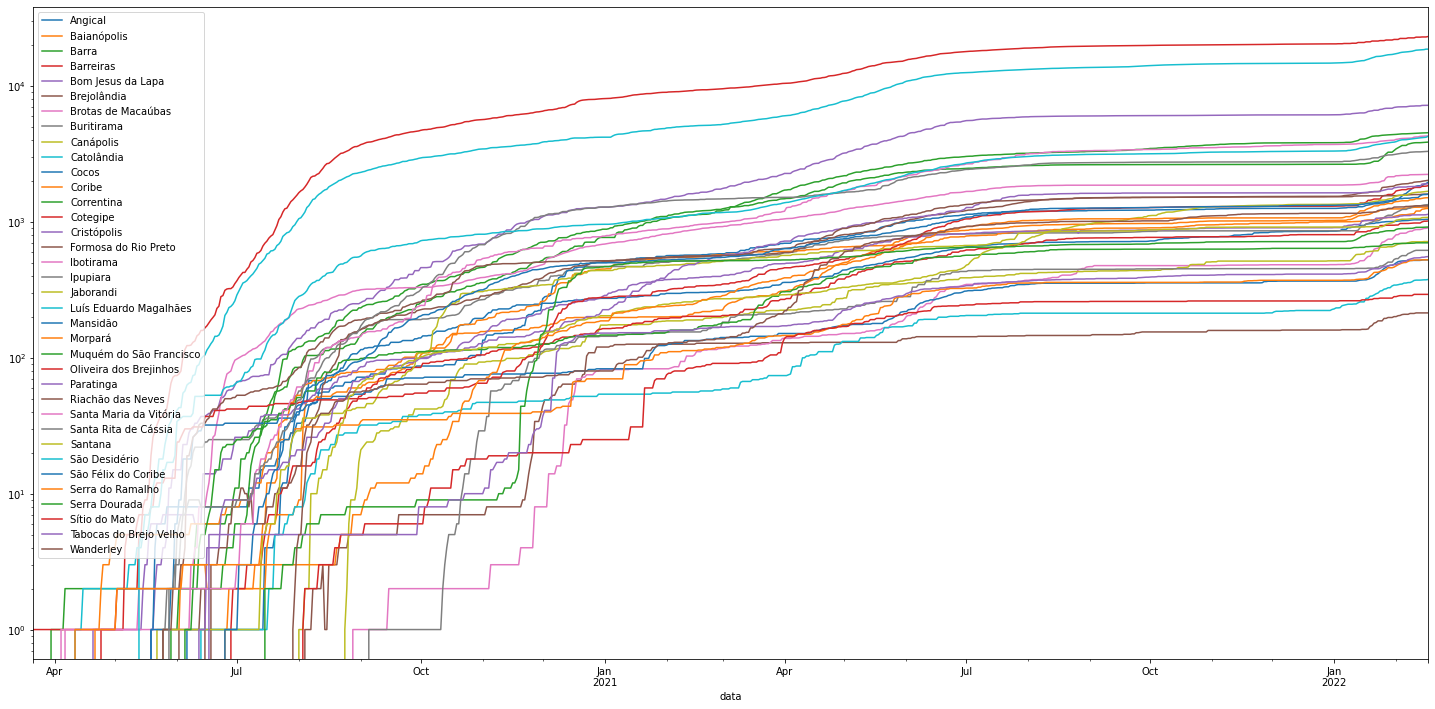

In [ ]:
casos_ac.set_index('data').plot(figsize=(25,12), logy=True)

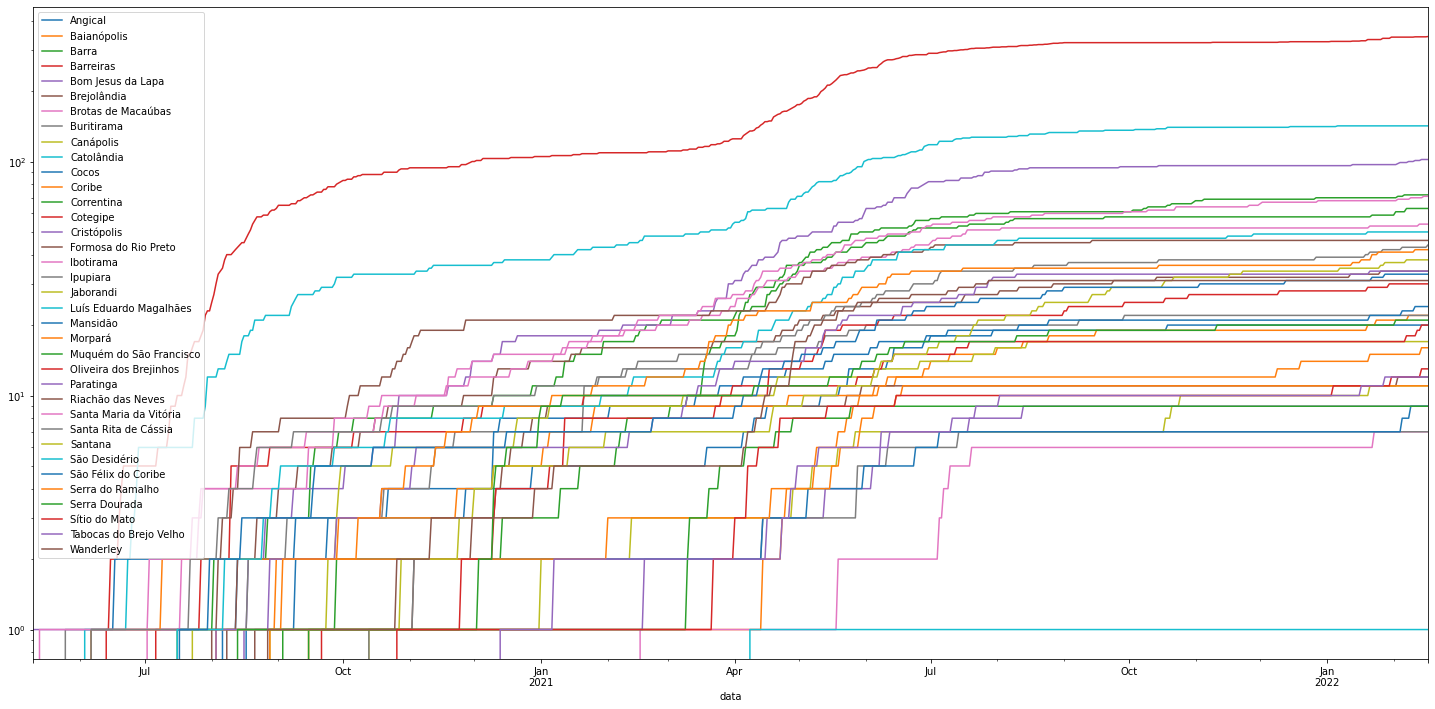

In [ ]:
obitos_ac.set_index('data').plot(figsize=(25,12), logy=True)

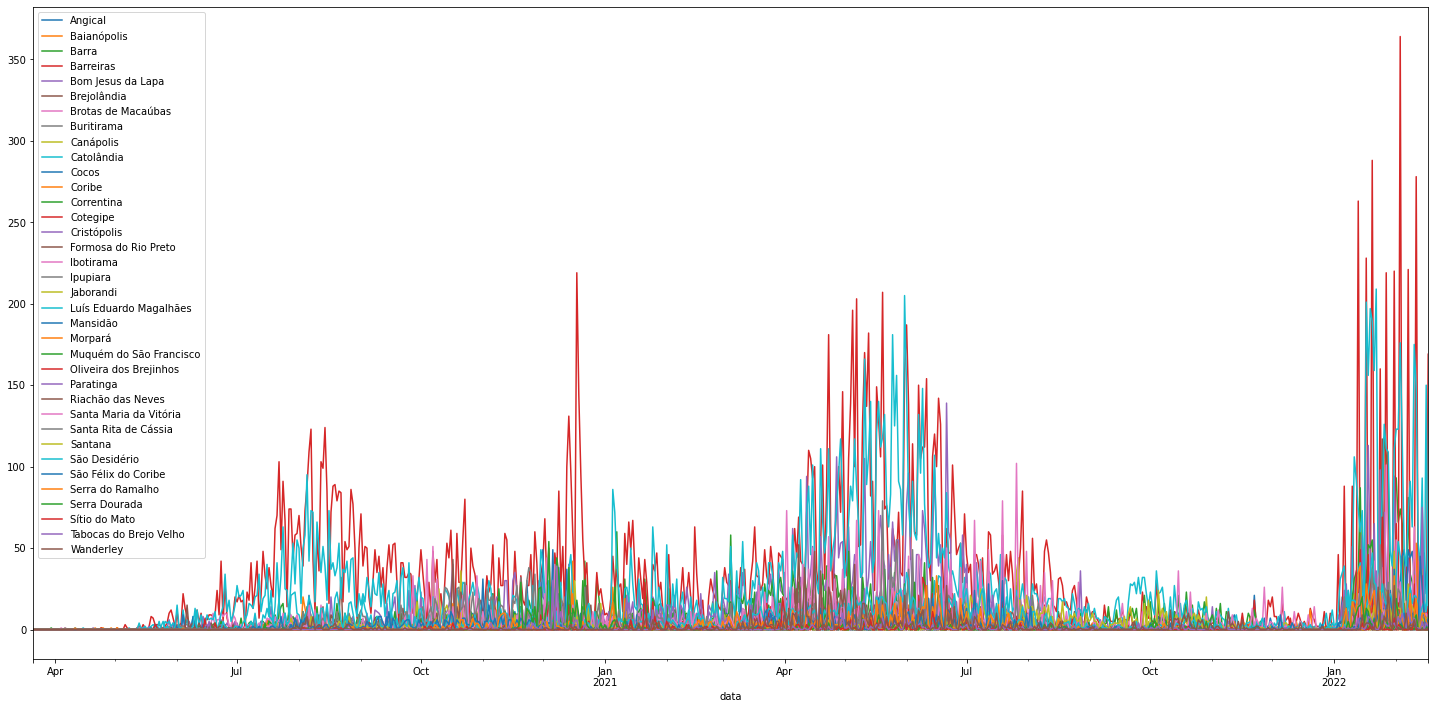

In [ ]:
casos_nv.set_index('data').plot(figsize=(25,12))

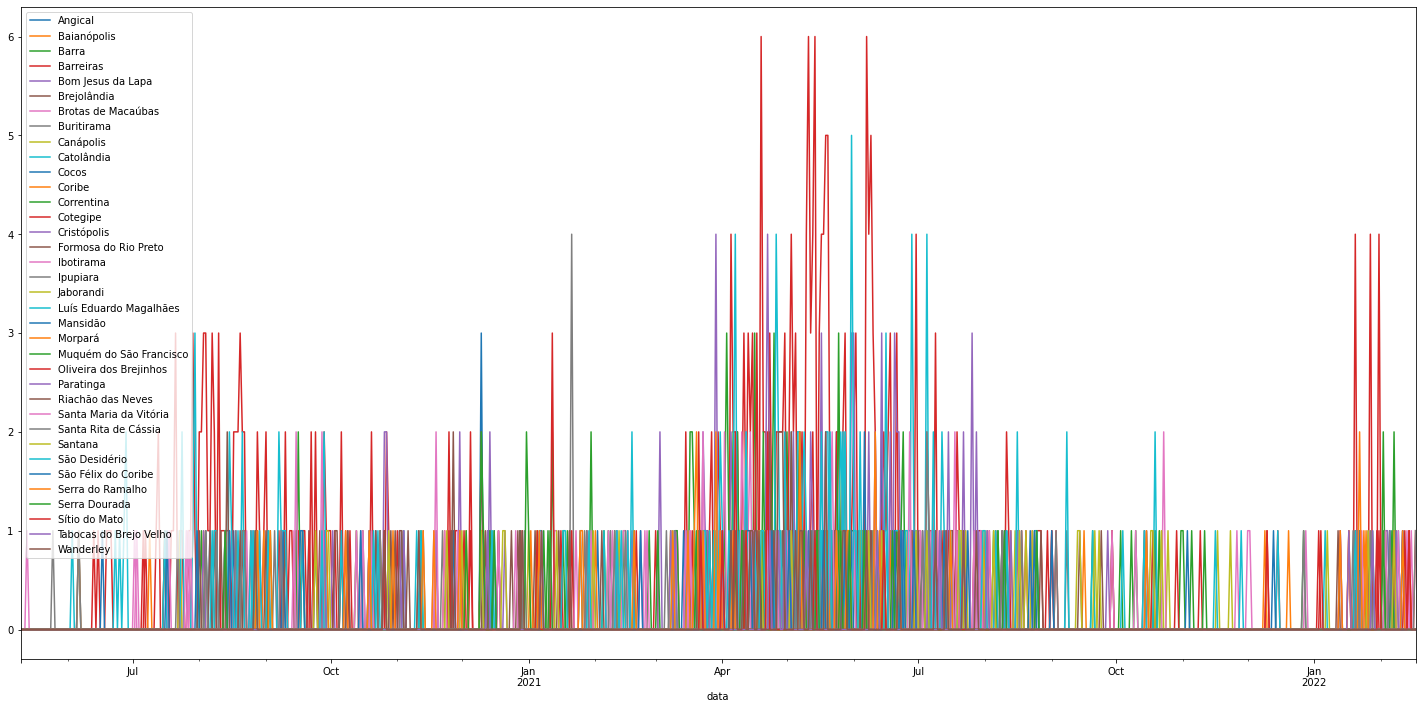

In [ ]:
obitos_nv.set_index('data').plot(figsize=(25,12))

## Modelo relacional dos dados

### Criação dos dataframes relacionais (incrementar essa parte com todos os dados tratados para criar uma base para o github)

In [ ]:
def cria_dataframe_relacional(data, cidade, df_serie, nome):
  df_temp = df_serie.copy()
  df_temp.drop('data', inplace=True, axis=1) # remove a coluna datas
  df_temp = df_temp.T.reset_index(drop=True).copy() #transpõe o dataframe e reseta nome de cidades
  df_rel = df_temp.copy()

  for i in range(len(data)):
    df_rel.rename(columns={df_rel.columns[i]:data[i]}, inplace=True) # renomeia as colunas com as datas

  df_rel.insert(0, 'cidade', cidade) # insere coluna com as cidades
  df_rel = df_rel.set_index(['cidade']).T.copy()
  df_rel = df_rel.stack(level=0).reset_index().rename(columns={'level_0':'data',0:nome}).copy()

  return df_rel

In [ ]:
df_rel_ac = cria_dataframe_relacional(datas_casos, cidades, casos_ac, 'casos')
df_rel_nv = cria_dataframe_relacional(datas_casos, cidades, casos_nv, 'casos_novos')
df_rel_ob_ac = cria_dataframe_relacional(datas_obitos, cidades, obitos_ac, 'obitos')
df_rel_ob_nv = cria_dataframe_relacional(datas_obitos, cidades, obitos_nv, 'obitos_novos')
df_rel_nv_sem = cria_dataframe_relacional(datas_casos, cidades, casos_nv_sem, 'casos_novos_2sem')
df_rel_ob_nv_sem = cria_dataframe_relacional(datas_obitos, cidades, obitos_nv_sem, 'obitos_novos_2sem')
df_rel_nv_med_movel = cria_dataframe_relacional(datas_casos, cidades, casos_med_movel, 'media_movel_casos')
df_rel_var_perc_14dias_nv = cria_dataframe_relacional(datas_casos, cidades, casos_var_per_14dias, 'var_%_14dias_casos')
df_rel_ob_nv_med_movel = cria_dataframe_relacional(datas_obitos, cidades, obitos_med_movel, 'media_movel_obitos')
df_rel_var_perc_14dias_ob_nv = cria_dataframe_relacional(datas_obitos, cidades, obitos_var_per_14dias, 'var_%_14dias_obitos')

In [ ]:
df_rel_casos = pd.concat([df_rel_ac.set_index('data'),
                          df_rel_nv.set_index('data')[['casos_novos']],
                          df_rel_nv_med_movel.set_index('data')[['media_movel_casos']],
                          df_rel_var_perc_14dias_nv.set_index('data')[['var_%_14dias_casos']]], axis=1)

df_rel_obitos = pd.concat([df_rel_ob_ac.set_index('data'),
                           df_rel_ob_nv.set_index('data')[['obitos_novos']],
                           df_rel_ob_nv_med_movel.set_index('data')[['media_movel_obitos']],
                           df_rel_var_perc_14dias_ob_nv.set_index('data')[['var_%_14dias_obitos']]], axis=1)

In [ ]:
df_rel_obitos

cidade  ...  var_%_14dias_obitos
data                                ...                     
2020-05-10                 Angical  ...                  0.0
2020-05-10             Baianópolis  ...                  0.0
2020-05-10                   Barra  ...                  0.0
2020-05-10               Barreiras  ...                  0.0
2020-05-10       Bom Jesus da Lapa  ...                  0.0
...                            ...  ...                  ...
2022-02-17        Serra do Ramalho  ...                  0.0
2022-02-17           Serra Dourada  ...                  0.0
2022-02-17           Sítio do Mato  ...                  0.0
2022-02-17  Tabocas do Brejo Velho  ...                  0.0
2022-02-17               Wanderley  ...                  0.0

[23364 rows x 5 columns]

### Figuras de experimentais

In [ ]:
casos_ac_macro = df_rel_ac.groupby('data').agg({'casos': 'sum'}).copy()
obitos_ac_macro = df_rel_ob_ac.groupby('data').agg({'obitos': 'sum'}).copy()

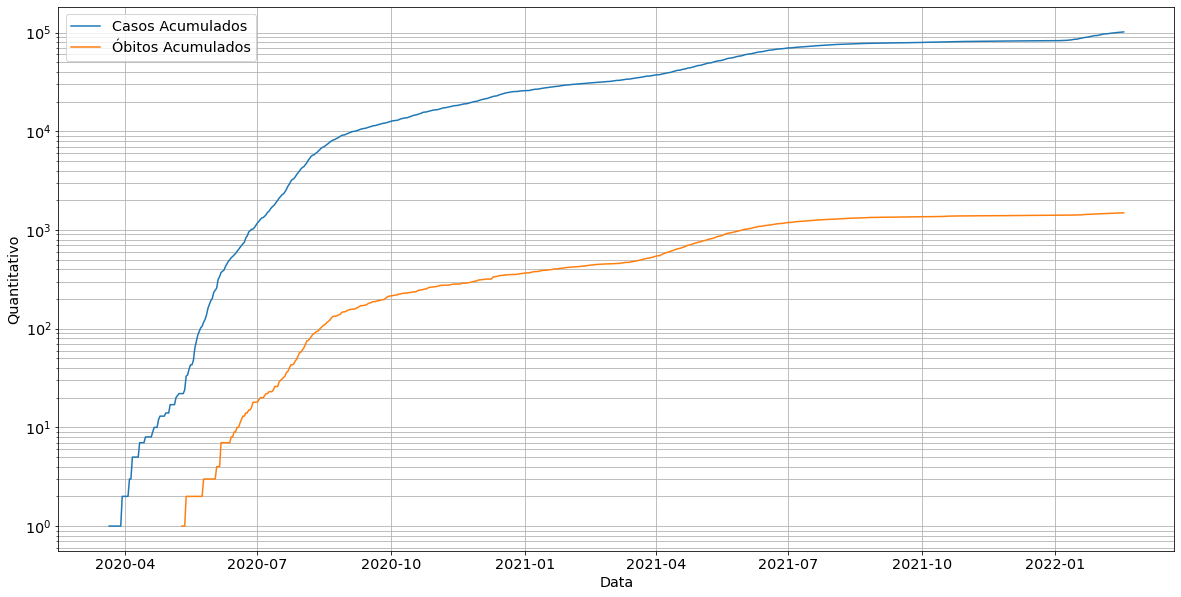

In [ ]:
d1 = casos_ac_macro.reset_index().copy()
d2 = obitos_ac_macro.reset_index().copy()
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.plot(d1.data, d1.casos)
plt.plot(d2.data, d2.obitos)
plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Quantitativo')
plt.grid(True, which='both')
plt.legend(['Casos Acumulados', 'Óbitos Acumulados'])
#plt.savefig("casos_obitos_ac_logscale.png")
#files.download("casos_obitos_ac_logscale.png")

In [ ]:
populacao = pd.Series([13977, 13877, 155439, 10557, 3577, 13782, 13910, 25591, 87519, 13643, 22339, 28338, 
                       33742, 12518, 12238, 69148, 9711, 18777, 14194, 32137, 8385, 39845, 26614, 15391, 18320, 
                       31472, 13012, 53578, 10231, 21174, 26927, 9865, 8519, 11348, 21825, 32000])
cidades_por_micro=['Angical', 'Baianópolis', 'Barreiras', 'Brejolândia', 'Catolândia',
                   'Cotegipe', 'Cristópolis', 'Formosa do Rio Preto',
                   'Luís Eduardo Magalhães', 'Mansidão', 'Riachão das Neves',
                   'Santa Rita de Cássia', 'São Desidério', 'Tabocas do Brejo Velho',
                   'Wanderley', 'Bom Jesus da Lapa', 'Canápolis', 'Cocos', 'Coribe',
                   'Correntina', 'Jaborandi', 'Santa Maria da Vitória', 'Santana',
                   'São Félix do Coribe', 'Serra Dourada', 'Serra do Ramalho',
                   'Sítio do Mato', 'Barra', 'Brotas de Macaúbas', 'Buritirama',
                   'Ibotirama', 'Ipupiara', 'Morpará', 'Muquém do São Francisco',
                   'Oliveira dos Brejinhos', 'Paratinga']

In [ ]:
# Cria dataframe com as cidades em uma coluna e as respetivas populações na segunda coluna
df_cid_pop = pd.DataFrame({'cidade':cidades_por_micro, 'populacao':populacao})
df_cid_pop

cidade  populacao
0                   Angical      13977
1               Baianópolis      13877
2                 Barreiras     155439
3               Brejolândia      10557
4                Catolândia       3577
5                  Cotegipe      13782
6               Cristópolis      13910
7      Formosa do Rio Preto      25591
8    Luís Eduardo Magalhães      87519
9                  Mansidão      13643
10        Riachão das Neves      22339
11     Santa Rita de Cássia      28338
12            São Desidério      33742
13   Tabocas do Brejo Velho      12518
14                Wanderley      12238
15        Bom Jesus da Lapa      69148
16                Canápolis       9711
17                    Cocos      18777
18                   Coribe      14194
19               Correntina      32137
20                Jaborandi       8385
21   Santa Maria da Vitória      39845
22                  Santana      26614
23      São Félix do Coribe      15391
24            Serra Dourada      18320
25         Serra do Ramalho      31472
26            Sítio do Mato      13012
27                    Barra      53578
28       Brotas de Macaúbas      10231
29               Buritirama      21174
30                Ibotirama      26927
31                 Ipupiara       9865
32                  Morpará       8519
33  Muquém do São Francisco      11348
34   Oliveira dos Brejinhos      21825
35                Paratinga      32000

In [ ]:
casos_ac

data  Angical  ...  Tabocas do Brejo Velho  Wanderley
0   2020-03-21        0  ...                       0          0
1   2020-03-22        0  ...                       0          0
2   2020-03-23        0  ...                       0          0
3   2020-03-24        0  ...                       0          0
4   2020-03-25        0  ...                       0          0
..         ...      ...  ...                     ...        ...
694 2022-02-13     1037  ...                     545       1312
695 2022-02-14     1041  ...                     550       1312
696 2022-02-15     1041  ...                     550       1312
697 2022-02-16     1044  ...                     554       1312
698 2022-02-17     1046  ...                     556       1313

[699 rows x 37 columns]

In [ ]:
# Cria dataframe para casos acumulados relativos onde divide-se o número de casos diário pela população e multiplica por 100k (padrão)
casos_ac_relativos = casos_ac.set_index('data')[cidades_por_micro].copy()
for i in range(len(cidades_por_micro)):
  casos_ac_relativos[cidades_por_micro[i]] = (casos_ac_relativos[cidades_por_micro[i]]/df_cid_pop.populacao[i])*100000

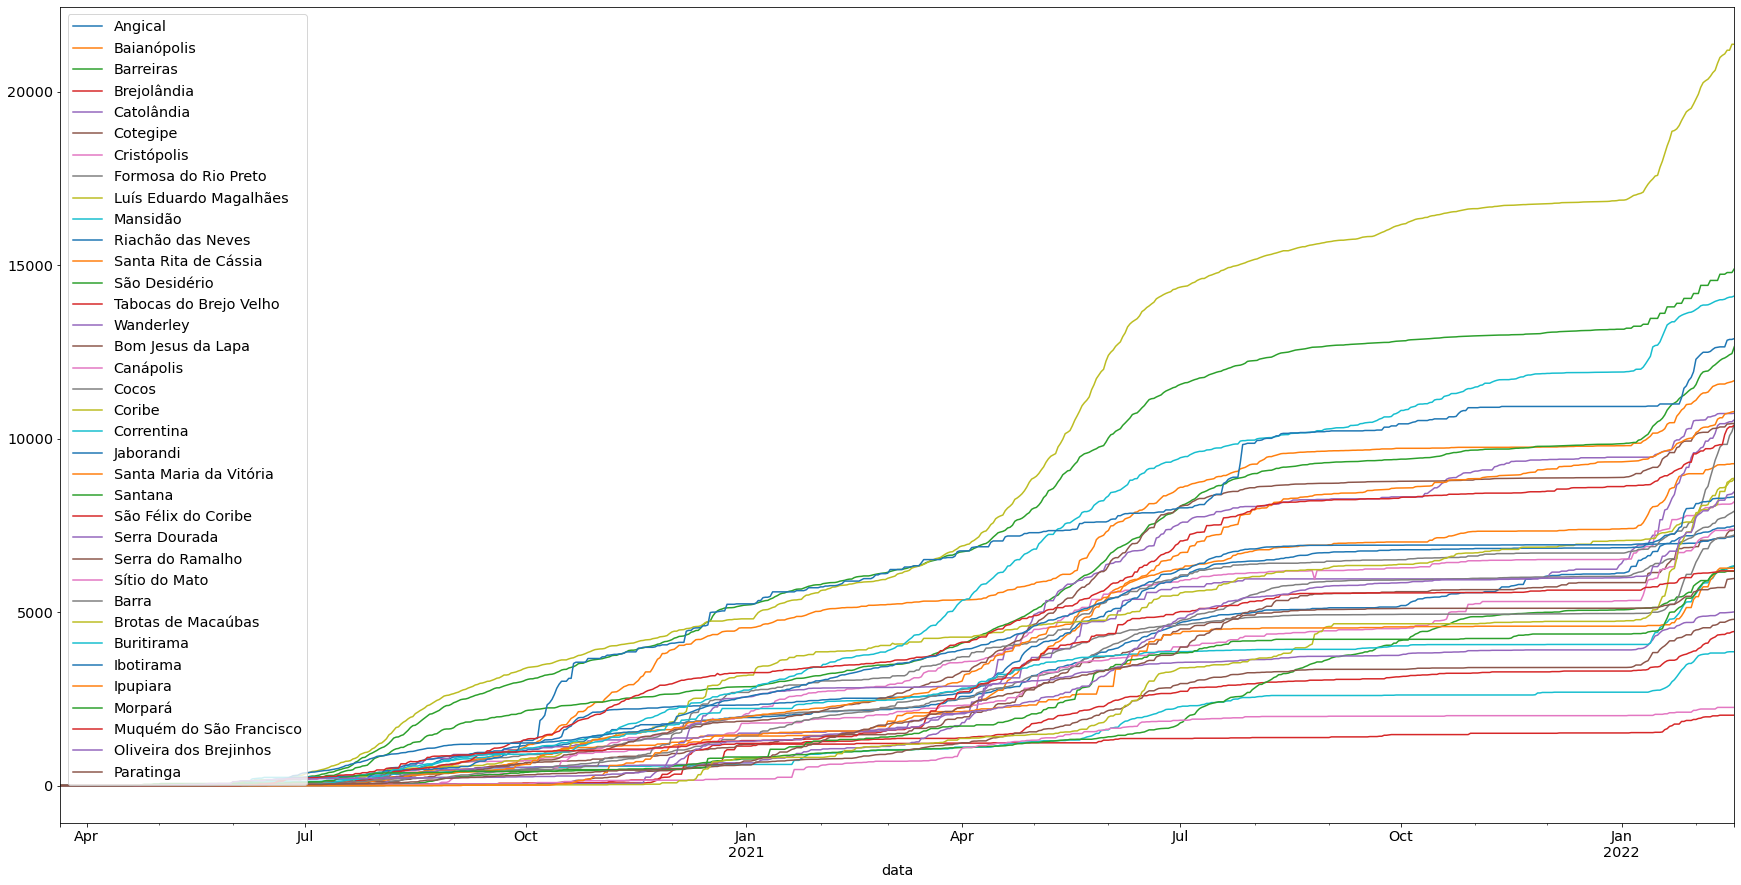

In [ ]:
casos_ac_relativos.plot(figsize=(30,15), logy=False)

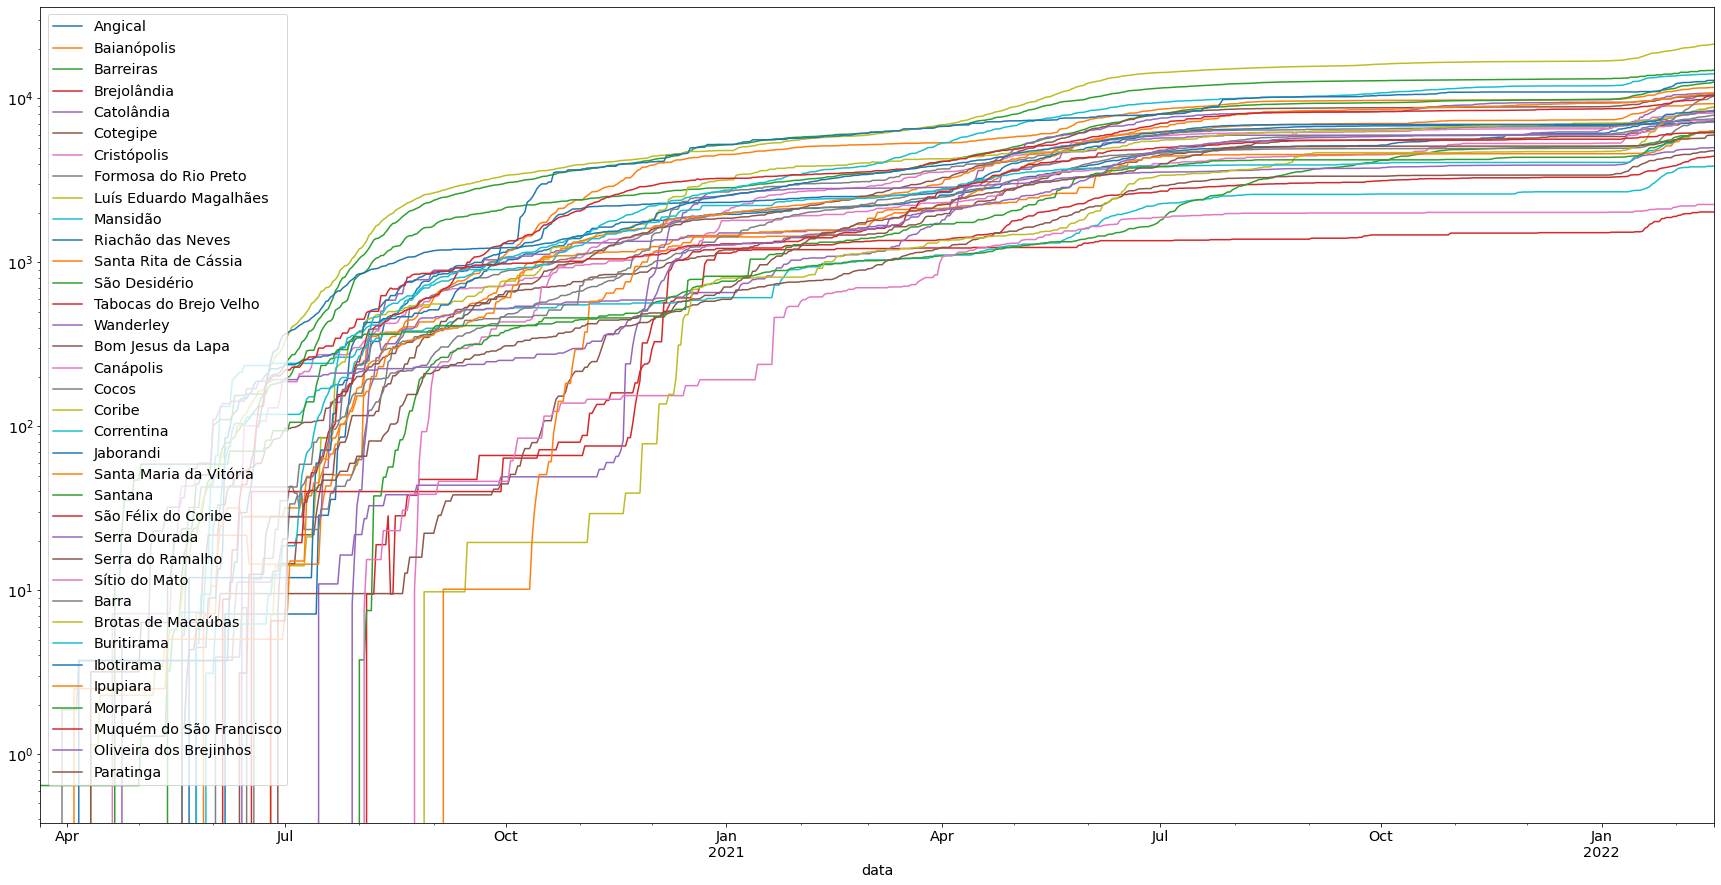

In [ ]:
casos_ac_relativos.plot(figsize=(30,15), logy=True)

### Cria dataframe com casos novos semanais relativos para todas as cidades da Macrorregião

In [ ]:
# Cria dataframe para casos novos semanais relativos onde divide-se o número de casos novos semanais pela população e multiplica por 100k (padrão)
casos_nv_sem_relativos = casos_nv_sem.set_index('data')[cidades_por_micro].copy()
for i in range(len(cidades_por_micro)):
  casos_nv_sem_relativos[cidades_por_micro[i]] = (casos_nv_sem_relativos[cidades_por_micro[i]]/df_cid_pop.populacao[i])*100000

In [ ]:
casos_nv_sem_relativos

Angical  Baianópolis  ...  Oliveira dos Brejinhos  Paratinga
data                                 ...                                   
2020-03-21    0.000000     0.000000  ...                0.000000      0.000
2020-03-22    0.000000     0.000000  ...                0.000000      0.000
2020-03-23    0.000000     0.000000  ...                0.000000      0.000
2020-03-24    0.000000     0.000000  ...                0.000000      0.000
2020-03-25    0.000000     0.000000  ...                0.000000      0.000
...                ...          ...  ...                     ...        ...
2022-02-13  221.792946   259.422065  ...              930.126002    253.125
2022-02-14  243.256779   273.834402  ...              930.126002    365.625
2022-02-15  214.638334   273.834402  ...              646.048110    353.125
2022-02-16  207.483723   288.246739  ...              595.647194    328.125
2022-02-17  214.638334   288.246739  ...              613.974800    325.000

[699 rows x 36 columns]

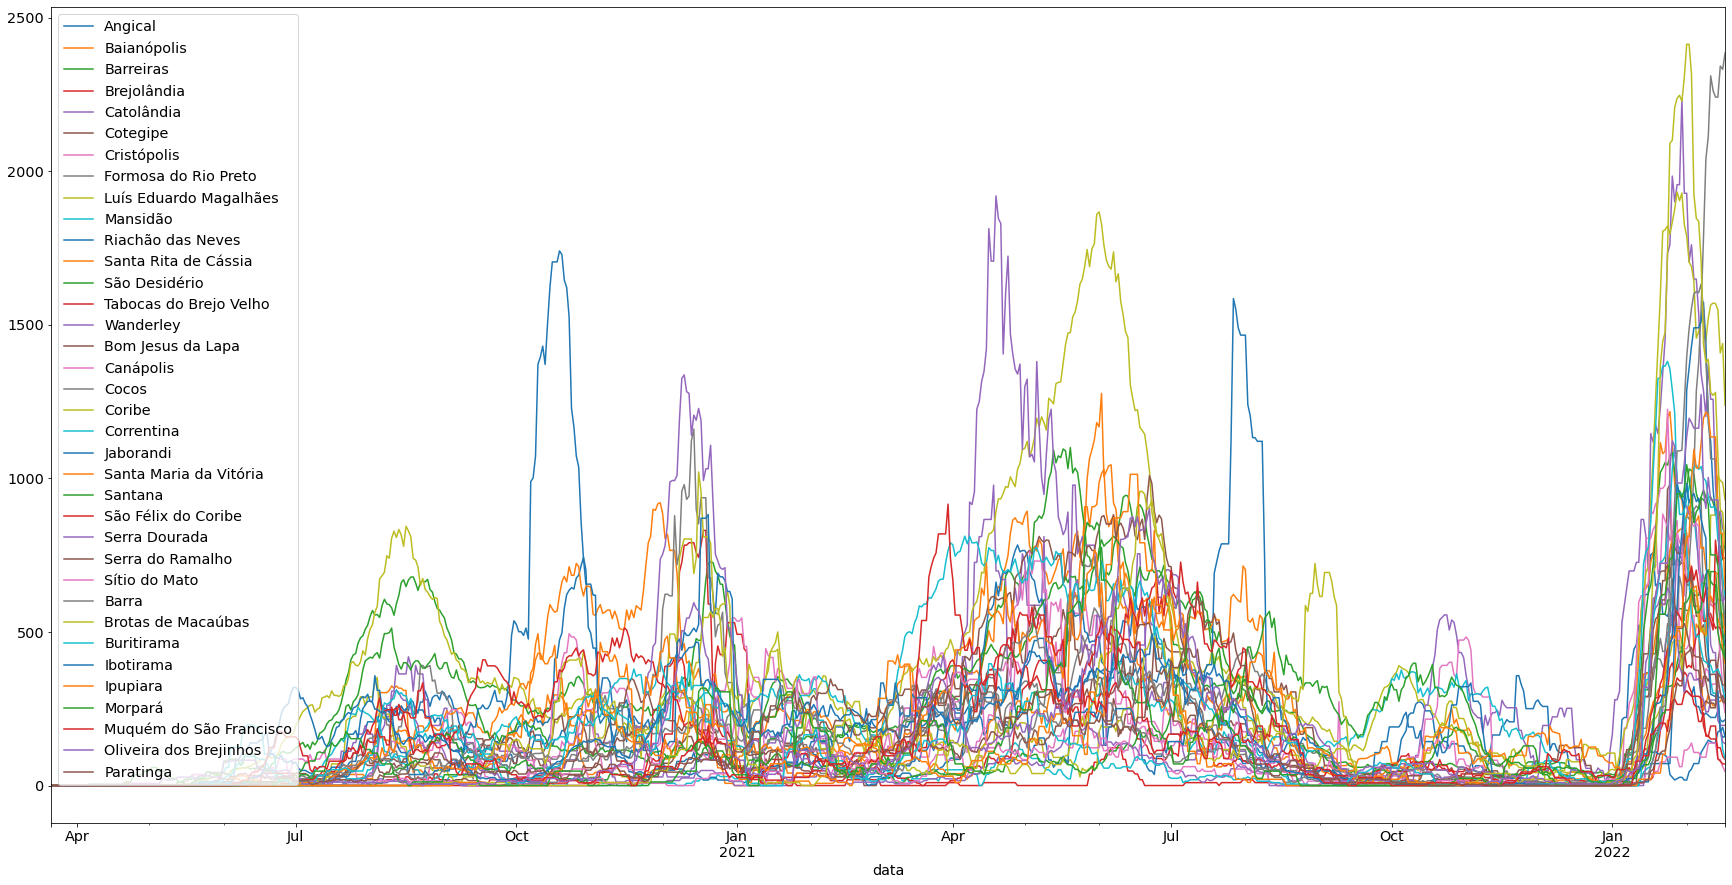

In [ ]:
casos_nv_sem_relativos.plot(figsize=(30,15))

## Cria dataframe com os casos acumulados da macrorregião e da Bahia

### Download e tratamento do arquivo de dados da Secretaria Estadual de Saúde do Estado da Bahia

In [ ]:
# Download do arquivo de dados diretamente do site da Secretaria Estadual de Saúde do Estado da Bahia
#url= 'https://ftp.sei.ba.gov.br/covid19/serie_casos_covid19_BA.csv'
#df_bahia = pd.read_csv(url, sep=';')
#df_bahia

In [ ]:
# Backup do arquivo de dados do SEI
#df_bahia.to_csv(r'/content/drive/MyDrive/Colab Notebooks/gt_dados/serie_casos_covid19_BA.csv')

In [ ]:
# Alternativa caso o site estiver down
df_bahia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gt_dados/serie_casos_covid19_BA.csv', sep=',')
df_bahia = df_bahia.drop(columns='Unnamed: 0').copy() # remove coluna com indices
df_bahia

date    casos  casos_novos
0    06/03/2020        1            1
1    07/03/2020        2            1
2    08/03/2020        2            0
3    09/03/2020        2            0
4    10/03/2020        2            0
..          ...      ...          ...
685  21/01/2022  1308146         5101
686  22/01/2022  1312371         4225
687  23/01/2022  1316452         4081
688  24/01/2022  1319176         2724
689  25/01/2022  1325321         6145

[690 rows x 3 columns]

In [ ]:
#casos_ac_bahia = df_bahia.set_index('date').copy()
casos_ac_bahia = df_bahia.copy()
casos_ac_bahia

date    casos  casos_novos
0    06/03/2020        1            1
1    07/03/2020        2            1
2    08/03/2020        2            0
3    09/03/2020        2            0
4    10/03/2020        2            0
..          ...      ...          ...
685  21/01/2022  1308146         5101
686  22/01/2022  1312371         4225
687  23/01/2022  1316452         4081
688  24/01/2022  1319176         2724
689  25/01/2022  1325321         6145

[690 rows x 3 columns]

In [ ]:
casos_ac_bahia.date = pd.to_datetime(casos_ac_bahia.date, format='%d/%m/%Y') # converte coluna de datas para o formato datetime
casos_ac_bahia

date    casos  casos_novos
0   2020-03-06        1            1
1   2020-03-07        2            1
2   2020-03-08        2            0
3   2020-03-09        2            0
4   2020-03-10        2            0
..         ...      ...          ...
685 2022-01-21  1308146         5101
686 2022-01-22  1312371         4225
687 2022-01-23  1316452         4081
688 2022-01-24  1319176         2724
689 2022-01-25  1325321         6145

[690 rows x 3 columns]

In [ ]:
casos_ac_bahia = casos_ac_bahia.drop(columns='casos_novos').copy() # remove coluna de casos novos
casos_ac_bahia = casos_ac_bahia.rename(columns={'date':'data', 'casos':'Bahia'}).copy() # renomeia colunas

In [ ]:
casos_ac_bahia

data    Bahia
0   2020-03-06        1
1   2020-03-07        2
2   2020-03-08        2
3   2020-03-09        2
4   2020-03-10        2
..         ...      ...
685 2022-01-21  1308146
686 2022-01-22  1312371
687 2022-01-23  1316452
688 2022-01-24  1319176
689 2022-01-25  1325321

[690 rows x 2 columns]

In [ ]:
datas_casos

DatetimeIndex(['2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30',
               ...
               '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11',
               '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15',
               '2022-02-16', '2022-02-17'],
              dtype='datetime64[ns]', length=699, freq='D')

In [ ]:
temp_casos_ac_bahia = casos_ac_bahia[(casos_ac_bahia.data >= datas_casos.format()[0]) & (casos_ac_bahia.data <= datas_casos.format()[-1])] # cria dataframe com o período considerado
temp_casos_ac_bahia.set_index('data', inplace=True) # coloca a data como índice
temp_casos_ac_bahia

Bahia
data               
2020-03-21       41
2020-03-22       55
2020-03-23       63
2020-03-24       79
2020-03-25       91
...             ...
2022-01-21  1308146
2022-01-22  1312371
2022-01-23  1316452
2022-01-24  1319176
2022-01-25  1325321

[675 rows x 1 columns]

### Criação de dataframe concatenando os casos acumulados do estado da Bahia com e da Macrorregião

In [ ]:
temp_casos_ac_macro = casos_ac_macro.rename(columns={'casos':'Macrorregião'}).copy()
temp_casos_ac_macro

Macrorregião
data                    
2020-03-21             1
2020-03-22             1
2020-03-23             1
2020-03-24             1
2020-03-25             1
...                  ...
2022-02-13        100111
2022-02-14        100676
2022-02-15        100857
2022-02-16        101132
2022-02-17        101530

[699 rows x 1 columns]

In [ ]:
casos_ac_bahia_macro = pd.concat([temp_casos_ac_bahia, temp_casos_ac_macro], axis=1) # concatena os dataframes separados
casos_ac_bahia_macro

Bahia  Macrorregião
data                           
2020-03-21   41.0             1
2020-03-22   55.0             1
2020-03-23   63.0             1
2020-03-24   79.0             1
2020-03-25   91.0             1
...           ...           ...
2022-02-13    NaN        100111
2022-02-14    NaN        100676
2022-02-15    NaN        100857
2022-02-16    NaN        101132
2022-02-17    NaN        101530

[699 rows x 2 columns]

In [ ]:
#salva_df(casos_ac_bahia_macro, 'serie_casos_acumulados_bahia_macro')

In [ ]:
#pop_bahia_macro = pd.DataFrame({'bahia': [14021432], 'macrorregiao': [953520]}) # Censo IBGE 2010
#pop_bahia_macro = pd.DataFrame({'Bahia': [14930634], 'Macrorregião': [953520]}) # Censo IBGE 2020
pop_bahia_macro = pd.DataFrame({'Bahia': [14873064], 'Macrorregião': [953520]}) # Boletim Epidemiológico SESAB
pop_bahia_macro

Bahia  Macrorregião
0  14873064        953520

In [ ]:
casos_ac_bahia_macro_relativos = casos_ac_bahia_macro.copy()
for col, pop in zip(casos_ac_bahia_macro.columns, pop_bahia_macro.columns):
  casos_ac_bahia_macro_relativos[col] = (casos_ac_bahia_macro[col]/pop_bahia_macro[pop][0])*100000

In [ ]:
casos_ac_bahia_macro_relativos

Bahia  Macrorregião
data                              
2020-03-21  0.275666      0.104875
2020-03-22  0.369796      0.104875
2020-03-23  0.423585      0.104875
2020-03-24  0.531162      0.104875
2020-03-25  0.611844      0.104875
...              ...           ...
2022-02-13       NaN  10499.098079
2022-02-14       NaN  10558.352211
2022-02-15       NaN  10577.334508
2022-02-16       NaN  10606.175015
2022-02-17       NaN  10647.915094

[699 rows x 2 columns]

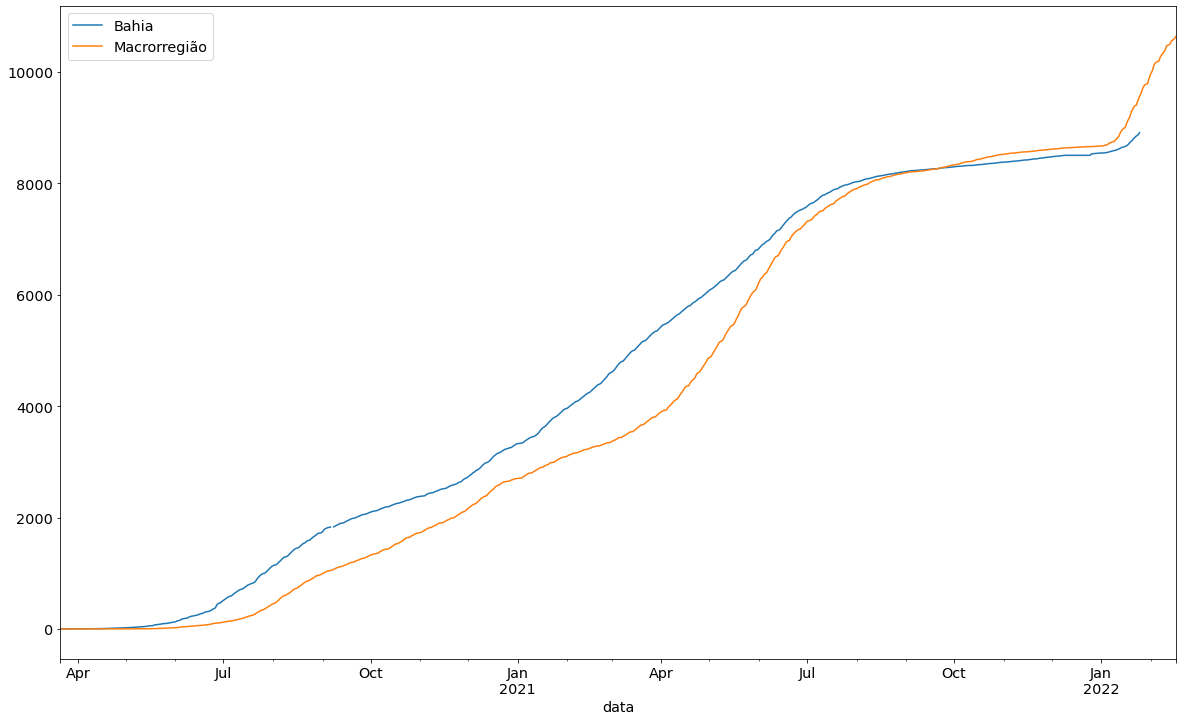

In [ ]:
casos_ac_bahia_macro_relativos.plot(figsize=(20,12), logy=False)

### Cria dataframe com casos novos semanais relativos da Bahia e Macrorregião

In [ ]:
estado_macro =  ['Bahia', 'Macrorregião']

In [ ]:
periodo = 14 #casos novos em duas semanas
casos_nv_sem_bahia_macro = cria_dataframe_periodo(datas_casos, estado_macro, casos_ac_bahia_macro.reset_index(), periodo)

In [ ]:
casos_nv_sem_bahia_macro

data  Bahia  Macrorregião
0   2020-03-21      0             0
1   2020-03-22      0             0
2   2020-03-23      0             0
3   2020-03-24      0             0
4   2020-03-25      0             0
..         ...    ...           ...
694 2022-02-13      0          6749
695 2022-02-14      0          6352
696 2022-02-15      0          5810
697 2022-02-16      0          5565
698 2022-02-17      0          4990

[699 rows x 3 columns]

In [ ]:
casos_nv_sem_bahia_macro_relativos = casos_nv_sem_bahia_macro.copy()

In [ ]:
for col, pop in zip(casos_ac_bahia_macro.columns, pop_bahia_macro.columns):
  casos_nv_sem_bahia_macro_relativos[col] = (casos_nv_sem_bahia_macro[col]/pop_bahia_macro[pop][0])*100000

### Cria dataframe ordenando as cidades com maiores coeficientes de incidência acumulados

In [ ]:
# Plotar apenas os gráficos dos cinco maiores coeficientes
casos_ac_relativos.iloc[-1:,:]

Angical  Baianópolis  ...  Oliveira dos Brejinhos  Paratinga
data                                 ...                                   
2022-02-17  7483.72326  9274.338834  ...             8467.353952    5968.75

[1 rows x 36 columns]

In [ ]:
# Cria um dataframe ordenando as colunas das cidades do maior para o menor coeficiente de incidência na data final 
cid_maiores_coef_inc = casos_ac_relativos.sort_values(by=datas_casos[-1], axis=1, ascending=False).copy()

In [ ]:
cid_maiores_coef_inc.columns[0:5]

Index(['Luís Eduardo Magalhães', 'Barreiras', 'Correntina', 'Jaborandi',
       'São Desidério'],
      dtype='object')

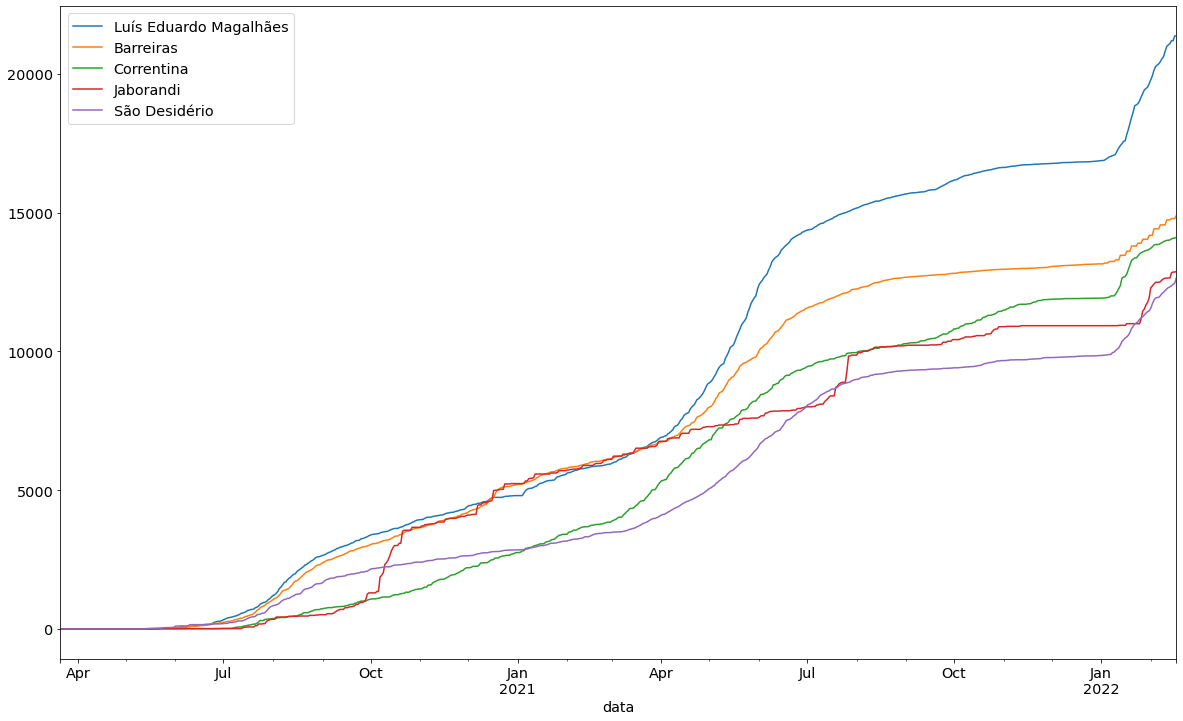

In [ ]:
cid_maiores_coef_inc.iloc[:,0:5].plot(figsize=(20,12), logy=False)

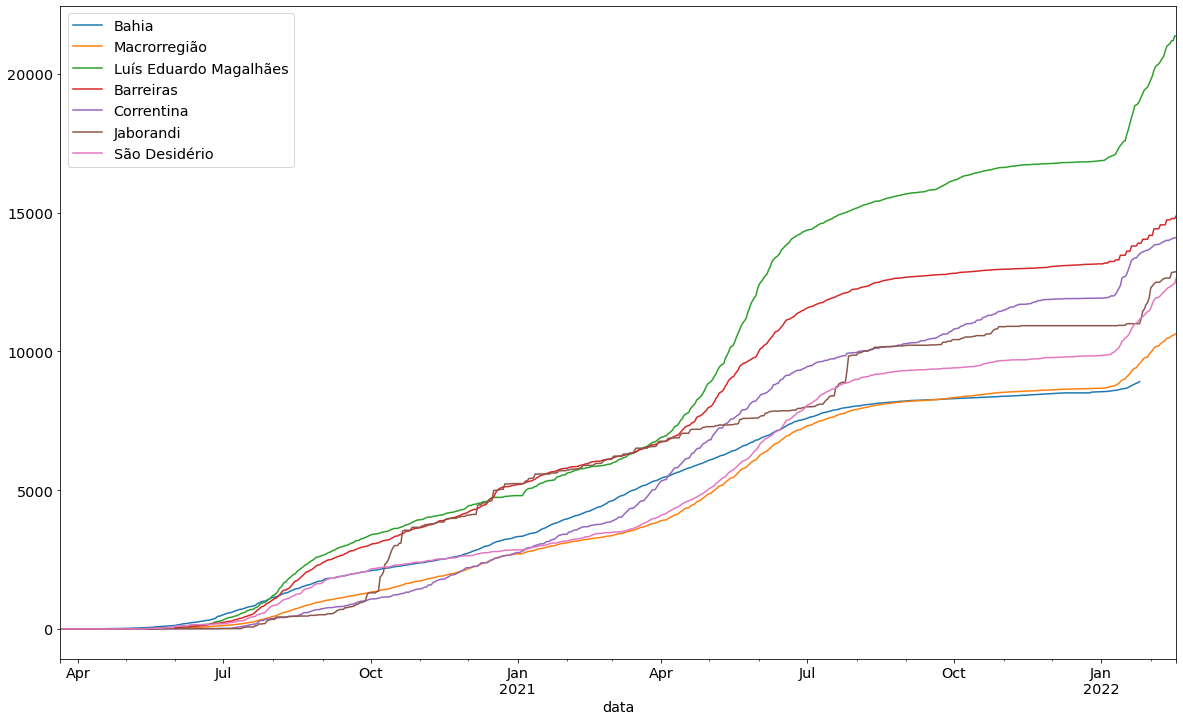

In [ ]:
ax = plt.gca()
casos_ac_bahia_macro_relativos.reset_index().plot(figsize=(20,12), x='data', ax=ax, logy=False)
cid_maiores_coef_inc.iloc[:,0:5].reset_index().plot(figsize=(20,12), x='data', ax=ax, logy=False)

### Cria dataframe ordenado com as cidades de maiores coeficientes de incidência semanais

In [ ]:
# Mostrar os coeficientes de incidência de duas semanas do último dia
casos_nv_sem_relativos.iloc[-1:,:]

Angical  Baianópolis  ...  Oliveira dos Brejinhos  Paratinga
data                                 ...                                   
2022-02-17  214.638334   288.246739  ...                613.9748      325.0

[1 rows x 36 columns]

In [ ]:
# Cria um dataframe ordenando as colunas das cidades do maior para o menor coeficiente de incidência de duas semanas na data final 
cid_maiores_coef_inc_sem = casos_nv_sem_relativos.sort_values(by=datas_casos[-1], axis=1, ascending=False).copy()

In [ ]:
cid_maiores_coef_inc_sem.columns[0:5]

Index(['Cocos', 'Luís Eduardo Magalhães', 'Coribe', 'Catolândia',
       'São Desidério'],
      dtype='object')

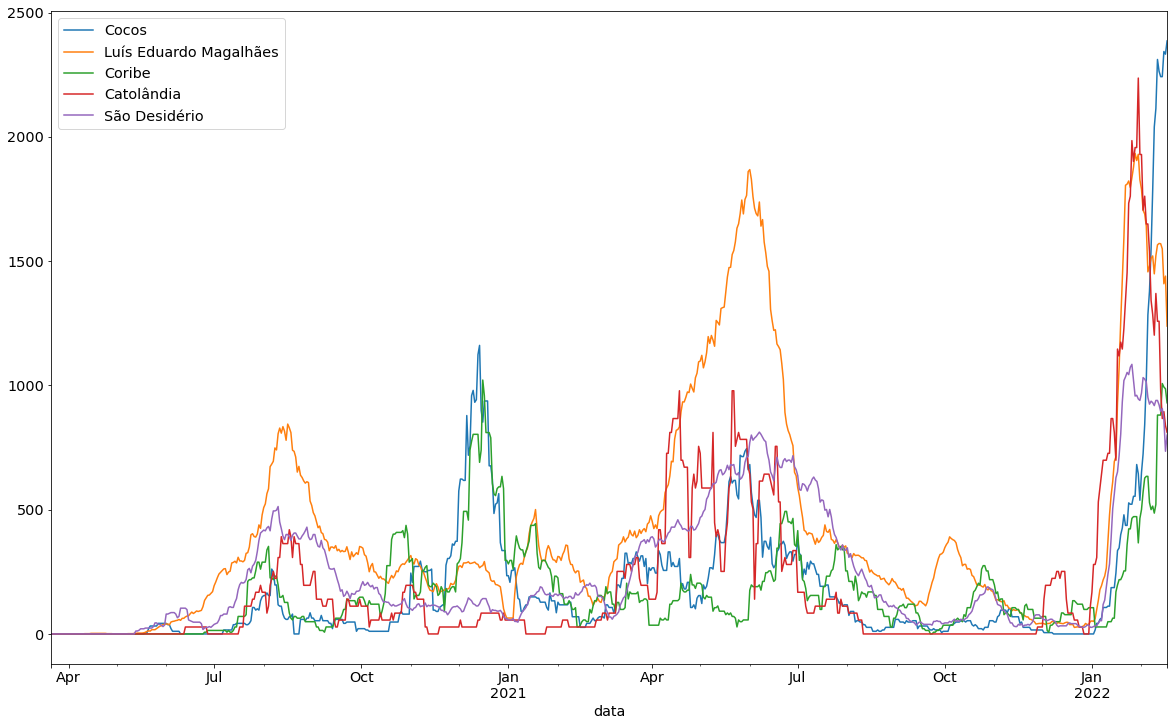

In [ ]:
cid_maiores_coef_inc_sem.iloc[:,0:5].plot(figsize=(20,12), logy=False)

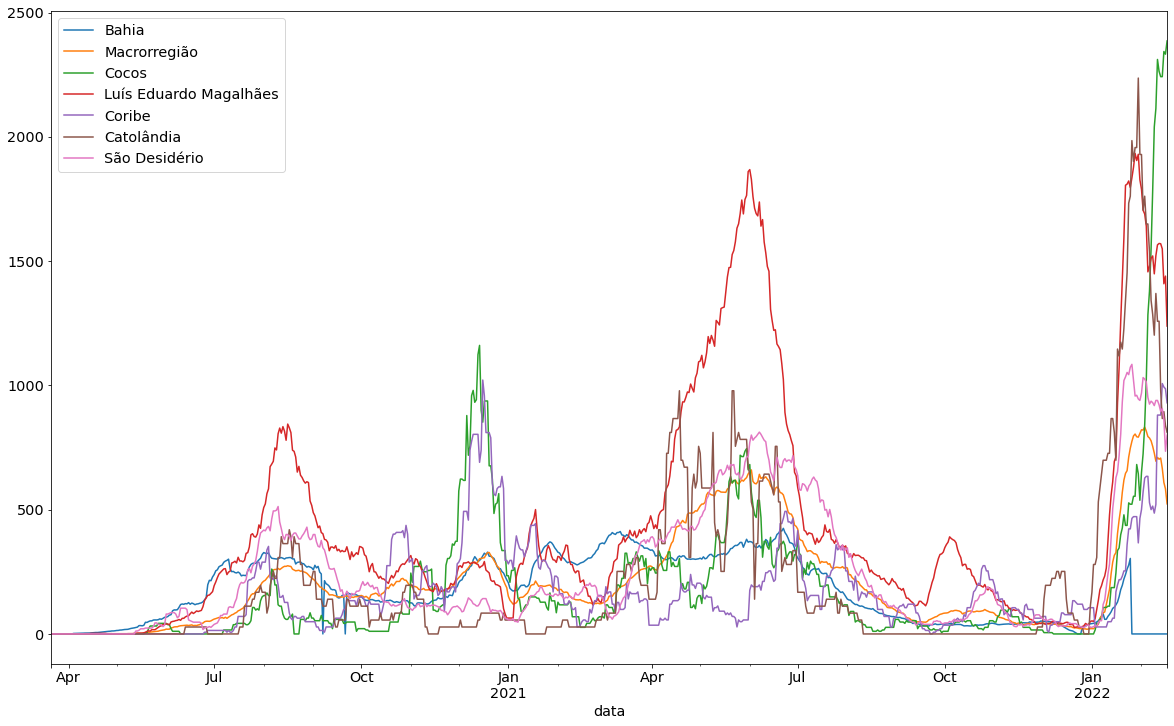

In [ ]:
ax = plt.gca()
casos_nv_sem_bahia_macro_relativos.plot(figsize=(20,12), x='data', ax=ax, logy=False)
cid_maiores_coef_inc_sem.iloc[:,0:5].reset_index().plot(figsize=(20,12), x='data', ax=ax, logy=False)

# Grava planilha com dados da macrorregião e municípios

In [ ]:
df_rel_nv.groupby('data').agg({'casos_novos': 'sum'}).reset_index().tail(14).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


casos_novos    4990
dtype: int64

In [ ]:
df_rel_nv.groupby('data').agg({'casos_novos': 'sum'}).reset_index().tail(15)

data  casos_novos
684 2022-02-03          973
685 2022-02-04          412
686 2022-02-05          171
687 2022-02-06           86
688 2022-02-07          720
689 2022-02-08          428
690 2022-02-09          314
691 2022-02-10          517
692 2022-02-11          680
693 2022-02-12           99
694 2022-02-13          144
695 2022-02-14          565
696 2022-02-15          181
697 2022-02-16          275
698 2022-02-17          398

In [ ]:
df_rel_ac.groupby('data').agg({'casos':'sum'}).tail(15)

casos
data              
2022-02-03   96540
2022-02-04   96952
2022-02-05   97123
2022-02-06   97209
2022-02-07   97929
2022-02-08   98357
2022-02-09   98671
2022-02-10   99188
2022-02-11   99868
2022-02-12   99967
2022-02-13  100111
2022-02-14  100676
2022-02-15  100857
2022-02-16  101132
2022-02-17  101530

In [ ]:
df_rel_ob_nv.groupby('data').agg({'obitos_novos': 'sum'}).reset_index()

data  obitos_novos
0   2020-05-10             0
1   2020-05-11             0
2   2020-05-12             0
3   2020-05-13             1
4   2020-05-14             0
..         ...           ...
644 2022-02-13             1
645 2022-02-14             4
646 2022-02-15             1
647 2022-02-16             0
648 2022-02-17             2

[649 rows x 2 columns]

In [ ]:
# Dataframe concatenando a incidência de casos novos semanais e acumulados da macrorregião
df_macro_incid_novos_sem = casos_nv_sem_bahia_macro_relativos[['data', 'Macrorregião']].rename(columns={'Macrorregião':'incid_novos_2sem'}).set_index('data')
df_macro_incid_acumulados = casos_ac_bahia_macro_relativos[['Macrorregião']].rename(columns={'Macrorregião':'incid_acumulados'})
df_incid_macro = pd.concat([np.round(df_macro_incid_novos_sem, 2), np.round(df_macro_incid_acumulados, 2)], axis=1)
df_incid_macro.index = df_incid_macro.index.strftime("%Y-%m-%d")

In [ ]:
# Dataframe concatemando a incidência de casos novos semanais e acumulados das 36 cidades da macrorregião
df_incid_novos_sem = cria_dataframe_relacional(datas_casos, cidades, casos_nv_sem_relativos[cidades]
                                               .reset_index(), 'incid_novos_2sem' )
df_incid_acumulados = cria_dataframe_relacional(datas_casos, cidades, casos_ac_relativos[cidades].reset_index(), 'incid_acumulados')
df_incid_municipios = pd.concat([np.round(df_incid_novos_sem.set_index('data'), 2),
                                 np.round(df_incid_acumulados.set_index('data').drop(columns=['cidade']), 2)], axis=1)
#df_incid_municipios.index = df_incid_municipios.index.strftime("%Y-%m-%d")


In [ ]:
df_incid_municipios

cidade  incid_novos_2sem  incid_acumulados
data                                                                  
2020-03-21                 Angical              0.00              0.00
2020-03-21             Baianópolis              0.00              0.00
2020-03-21                   Barra              0.00              0.00
2020-03-21               Barreiras              0.00              0.64
2020-03-21       Bom Jesus da Lapa              0.00              0.00
...                            ...               ...               ...
2022-02-17        Serra do Ramalho            270.08           4791.56
2022-02-17           Serra Dourada            136.46           5005.46
2022-02-17           Sítio do Mato             46.11           2251.77
2022-02-17  Tabocas do Brejo Velho            463.33           4441.60
2022-02-17               Wanderley            196.11          10728.88

[25164 rows x 3 columns]

In [ ]:
df_rel_nv.groupby('data').agg({'casos_novos': 'sum'}).reset_index()

data  casos_novos
0   2020-03-21            0
1   2020-03-22            0
2   2020-03-23            0
3   2020-03-24            0
4   2020-03-25            0
..         ...          ...
694 2022-02-13          144
695 2022-02-14          565
696 2022-02-15          181
697 2022-02-16          275
698 2022-02-17          398

[699 rows x 2 columns]

In [ ]:
def cria_dataframes_media_movel_variac_percent_macrorreg_cidades(df_rel_nv, df_rel_ob_nv, df_rel_nv_sem, df_rel_ob_nv_sem, df_rel_casos, df_rel_obitos):

  casos = df_rel_nv.groupby('data').agg({'casos_novos': 'sum'}).reset_index().copy()
  casos['media_movel_casos'] = casos.rolling(7).mean() # acrescenta coluna ao dataframe com média móvel
  casos = casos.round({'media_movel_casos': 0}).fillna(0).copy()
  casos['media_movel_casos'] = casos['media_movel_casos'].astype(int)
  casos['var_%_14dias_casos'] = round( (casos.media_movel_casos - casos.media_movel_casos.shift(13)) / casos.media_movel_casos.shift(13) * 100, 1)
  casos['casos_novos_2sem'] = df_rel_nv_sem.groupby('data').agg({'casos_novos_2sem': 'sum'}).reset_index()['casos_novos_2sem']
  casos['casos_novos_2sem'] = casos['casos_novos_2sem'].fillna(0).astype(int)
  obitos = df_rel_ob_nv.groupby('data').agg({'obitos_novos': 'sum'}).reset_index().copy()
  obitos['media_movel_obitos'] = obitos.rolling(7).mean()
  obitos = obitos.round({'media_movel_obitos': 0}).fillna(0).copy()
  obitos['media_movel_obitos'] = obitos['media_movel_obitos'].astype(int)
  obitos['var_%_14dias_obitos'] = round( (obitos.media_movel_obitos - obitos.media_movel_obitos.shift(13)) / obitos.media_movel_obitos.shift(13) * 100, 1)
  obitos['obitos_novos_2sem'] = df_rel_ob_nv_sem.groupby('data').agg({'obitos_novos_2sem': 'sum'}).reset_index()['obitos_novos_2sem']
  obitos['obitos_novos_2sem'] = obitos['obitos_novos_2sem'].fillna(0).astype(int)

  df_macro = pd.concat([casos.set_index('data'),obitos.set_index('data')], axis=1)
  df_macro.index = df_macro.index.strftime("%Y-%m-%d")
  df_macro['obitos_novos'] = df_macro['obitos_novos'].fillna(0).astype(int)
  df_macro['media_movel_obitos'] = df_macro['media_movel_obitos'].fillna(0).astype(int)
  df_macro['obitos_novos_2sem'] = df_macro['obitos_novos_2sem'].fillna(0).astype(int)


  casos = df_rel_casos.copy()
  df_rel_temp_casos = df_rel_nv_sem.copy()
  df_rel_temp_casos.set_index('data', inplace=True)
  df_rel_temp_casos['%2sem_da_macro'] = round( df_rel_nv_sem.set_index('data')[['casos_novos_2sem']]/df_rel_nv_sem.groupby(['data']).sum()*100, 2)
  casos = pd.concat([casos,
                     df_rel_temp_casos[['casos_novos_2sem', '%2sem_da_macro']],
                     df_incid_municipios[['incid_novos_2sem', 'incid_acumulados']]
                     ], axis=1)

  casos.index = casos.index.strftime("%Y-%m-%d")
  
  obitos = df_rel_obitos.copy()
  df_rel_temp_obitos = df_rel_ob_nv_sem.copy()
  df_rel_temp_obitos.set_index('data', inplace=True)
  df_rel_temp_obitos['%2sem_da_macro'] = round( df_rel_ob_nv_sem.set_index('data')[['obitos_novos_2sem']]/df_rel_ob_nv_sem.groupby(['data']).sum()*100, 2)
  obitos = pd.concat([obitos, df_rel_temp_obitos[['obitos_novos_2sem', '%2sem_da_macro']]], axis=1)

  obitos.index = obitos.index.strftime("%Y-%m-%d")

  return df_macro, casos, obitos


In [ ]:
exibe_arq = cria_dataframes_media_movel_variac_percent_macrorreg_cidades(df_rel_nv,
                                                                         df_rel_ob_nv,
                                                                         df_rel_nv_sem,
                                                                         df_rel_ob_nv_sem,
                                                                         df_rel_casos,
                                                                         df_rel_obitos)

In [ ]:
exibe_arq[0]

casos_novos  ...  obitos_novos_2sem
data                     ...                   
2020-03-21            0  ...                  0
2020-03-22            0  ...                  0
2020-03-23            0  ...                  0
2020-03-24            0  ...                  0
2020-03-25            0  ...                  0
...                 ...  ...                ...
2022-02-13          144  ...                 31
2022-02-14          565  ...                 30
2022-02-15          181  ...                 31
2022-02-16          275  ...                 28
2022-02-17          398  ...                 26

[699 rows x 8 columns]

In [ ]:
exibe_arq[1]

cidade  casos  ...  incid_novos_2sem  incid_acumulados
data                                       ...                                    
2020-03-21                 Angical      0  ...              0.00              0.00
2020-03-21             Baianópolis      0  ...              0.00              0.00
2020-03-21                   Barra      0  ...              0.00              0.00
2020-03-21               Barreiras      1  ...              0.00              0.64
2020-03-21       Bom Jesus da Lapa      0  ...              0.00              0.00
...                            ...    ...  ...               ...               ...
2022-02-17        Serra do Ramalho   1508  ...            270.08           4791.56
2022-02-17           Serra Dourada    917  ...            136.46           5005.46
2022-02-17           Sítio do Mato    293  ...             46.11           2251.77
2022-02-17  Tabocas do Brejo Velho    556  ...            463.33           4441.60
2022-02-17               Wanderley   1313  ...            196.11          10728.88

[25164 rows x 9 columns]

In [ ]:
exibe_arq[2]

cidade  obitos  ...  obitos_novos_2sem  %2sem_da_macro
data                                        ...                                   
2020-05-10                 Angical       0  ...                  0             NaN
2020-05-10             Baianópolis       0  ...                  0             NaN
2020-05-10                   Barra       0  ...                  0             NaN
2020-05-10               Barreiras       0  ...                  0             NaN
2020-05-10       Bom Jesus da Lapa       0  ...                  0             NaN
...                            ...     ...  ...                ...             ...
2022-02-17        Serra do Ramalho      42  ...                  1            3.85
2022-02-17           Serra Dourada      21  ...                  0            0.00
2022-02-17           Sítio do Mato      13  ...                  1            3.85
2022-02-17  Tabocas do Brejo Velho      12  ...                  0            0.00
2022-02-17               Wanderley      31  ...                  0            0.00

[23364 rows x 7 columns]

In [ ]:
import google.auth
from google.colab import auth
from gspread_pandas import Spread

auth.authenticate_user()
credentials, project_id = google.auth.default()

nome_planilha = 'dados_dashboard_covid19'

spread = Spread(nome_planilha, creds=credentials)
spread.df_to_sheet(exibe_arq[1], index=True, sheet='municípios casos', replace=True)
spread.df_to_sheet(exibe_arq[2], index=True, sheet='municípios óbitos', replace=True)
print(spread)

<gspread_pandas.spread.Spread - 'User: 'pedro.dias@ufob.edu.br', Spread: 'dados_dashboard_covid19', Sheet: 'municípios óbitos''>


# Ocupação média semanal de leitos

##Processamento dos dados

In [ ]:
df_leitos

0   ...          79
0                         Unidade Hospitalar  ...  2022-02-23
1                        HO (Clínicos Total)  ...            
2                     HO (Clínicos Ocupados)  ...            
3                             HO (UTI Total)  ...            
4                          HO (UTI Ocupados)  ...            
5                          ITIBA (UTI Total)  ...            
6                       ITIBA (UTI Ocupados)  ...            
7                      HMED (Clínicos Total)  ...            
8                   HMED (Clínicos Ocupados)  ...            
9          Hosp. Santa Rita (Clínicos Total)  ...            
10      Hosp. Santa Rita (Clínicos Ocupados)  ...            
11              Hosp. Santa Rita (UTI Total)  ...            
12           Hosp. Santa Rita (UTI Ocupados)  ...            
13      Hosp. Carmela Dutra (Clínicos Total)  ...            
14   Hosp. Carmela Dutra (Clínicos Ocupados)  ...            
15           Hosp. Carmela Dutra (UTI Total)  ...            
16  Hosp. Carmela Dutra (UTI Total Ocupados)  ...            

[17 rows x 80 columns]

### Seleção e organização dos dados a partir da planilha

In [ ]:
data_final = casos_ac.data.iloc[-1].strftime("%Y-%m-%d")
data_final

'2022-02-17'

In [ ]:
# Data em que o Renan começou a lançar a série temporal de dados de ocupação de leitos
data_inicial = '2021-12-07'

In [ ]:
leitos_temp = df_leitos.iloc[1:17,:].copy()
leitos_temp.columns = df_leitos.iloc[0]
leitos_temp.reset_index().loc[:,data_inicial: data_final]

0  2021-12-07 2021-12-08 2021-12-09  ... 2022-02-15 2022-02-16 2022-02-17
0           5          5          5  ...          5          5          5
1           1          1          2  ...          3          2          2
2          15         15         15  ...         15         15         15
3           3          3          5  ...          8          7          9
4          10         10         10  ...          0          0          0
5           0          0          0  ...          0          0          0
6          43         43         43  ...         43         43         43
7           0          1          0  ...          1          1          1
8          10         10         10  ...         10         10         10
9           0          0          1  ...          2          1          2
10         10         10         10  ...         10         10         10
11          1          1          0  ...          5          6          5
12         19         19         19  ...         19         19         19
13          0          0          0  ...          0          0          0
14         10         10         10  ...         10         10         10
15          1          1          2  ...          2          2          2

[16 rows x 73 columns]

In [ ]:
df_temp_leitos = leitos_temp.reset_index().loc[:, data_inicial : data_final]
for col in df_temp_leitos.columns:
  df_temp_leitos[col] = df_temp_leitos[col].str.replace('\.','').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
HO_tot = (df_temp_leitos.iloc[0]+df_temp_leitos.iloc[2]).to_numpy()
HO_ocup = (df_temp_leitos.iloc[1] + df_temp_leitos.iloc[3]).to_numpy()
ITIBA_tot = (df_temp_leitos.iloc[4]).to_numpy()
ITIBA_ocup = (df_temp_leitos.iloc[5]).to_numpy()
HMED_tot = (df_temp_leitos.iloc[6]).to_numpy()
HMED_ocup = (df_temp_leitos.iloc[7]).to_numpy()
HSR_tot = (df_temp_leitos.iloc[8]+df_temp_leitos.iloc[10]).to_numpy()
HSR_ocup = (df_temp_leitos.iloc[9]+df_temp_leitos.iloc[11]).to_numpy()
HCD_tot = (df_temp_leitos.iloc[12]+df_temp_leitos.iloc[14]).to_numpy()
HCD_ocup = (df_temp_leitos.iloc[13]+df_temp_leitos.iloc[15]).to_numpy()

### Dataframe com cidades e regiões de saúde

In [ ]:
data = [
        ['Angical', 'Barreiras'],
        ['Baianópolis', 'Barreiras'],
        ['Barra', 'Ibotirama'],
        ['Barreiras', 'Barreiras'],
        ['Bom Jesus da Lapa', 'SaMaVi'],
        ['Brejolândia', 'Barreiras'],
        ['Brotas de Macaúbas', 'Ibotirama'],
        ['Buritirama', 'Ibotirama'],
        ['Canápolis', 'SaMaVi'],
        ['Catolândia', 'Barreiras'],
        ['Cocos', 'SaMaVi'],
        ['Coribe', 'SaMaVi'],
        ['Correntina', 'SaMaVi'],
        ['Cotegipe', 'Barreiras'],
        ['Cristópolis', 'Barreiras'],
        ['Formosa do Rio Preto', 'Barreiras'],
        ['Ibotirama', 'Ibotirama'],
        ['Ipupiara', 'Ibotirama'],
        ['Jaborandi', 'SaMaVi'],
        ['Luís Eduardo Magalhães', 'Barreiras'],
        ['Mansidão', 'Barreiras'],
        ['Morpará', 'Ibotirama'],
        ['Muquém do São Francisco', 'Ibotirama'],
        ['Oliveira dos Brejinhos', 'Ibotirama'],
        ['Paratinga', 'Ibotirama'],
        ['Riachão das Neves', 'Barreiras'],
        ['Santa Maria da Vitória', 'SaMaVi'],
        ['Santa Rita de Cássia', 'Barreiras'],
        ['Santana', 'SaMaVi'],
        ['São Desidério', 'Barreiras'],
        ['São Félix do Coribe', 'SaMaVi'],
        ['Serra do Ramalho', 'SaMaVi'],
        ['Serra Dourada', 'SaMaVi'],
        ['Sítio do Mato', 'SaMaVi'],
        ['Tabocas do Brejo Velho', 'Barreiras'],
        ['Wanderley', 'Barreiras']
        ]

df_cid_reg_saude =  pd.DataFrame(data, columns=['cidade', 'reg_saude'])
df_cid_reg_saude

cidade  reg_saude
0                   Angical  Barreiras
1               Baianópolis  Barreiras
2                     Barra  Ibotirama
3                 Barreiras  Barreiras
4         Bom Jesus da Lapa     SaMaVi
5               Brejolândia  Barreiras
6        Brotas de Macaúbas  Ibotirama
7                Buritirama  Ibotirama
8                 Canápolis     SaMaVi
9                Catolândia  Barreiras
10                    Cocos     SaMaVi
11                   Coribe     SaMaVi
12               Correntina     SaMaVi
13                 Cotegipe  Barreiras
14              Cristópolis  Barreiras
15     Formosa do Rio Preto  Barreiras
16                Ibotirama  Ibotirama
17                 Ipupiara  Ibotirama
18                Jaborandi     SaMaVi
19   Luís Eduardo Magalhães  Barreiras
20                 Mansidão  Barreiras
21                  Morpará  Ibotirama
22  Muquém do São Francisco  Ibotirama
23   Oliveira dos Brejinhos  Ibotirama
24                Paratinga  Ibotirama
25        Riachão das Neves  Barreiras
26   Santa Maria da Vitória     SaMaVi
27     Santa Rita de Cássia  Barreiras
28                  Santana     SaMaVi
29            São Desidério  Barreiras
30      São Félix do Coribe     SaMaVi
31         Serra do Ramalho     SaMaVi
32            Serra Dourada     SaMaVi
33            Sítio do Mato     SaMaVi
34   Tabocas do Brejo Velho  Barreiras
35                Wanderley  Barreiras

### Dataframe com os dias desde que a ocupação de leitos foi contabilizada (2021-12-07)

In [ ]:
df_dias_ocup_leitos = pd.DataFrame({'data': pd.date_range(start=data_inicial, end=data_final, freq='D').strftime("%Y-%m-%d")})
df_dias_ocup_leitos

data
0   2021-12-07
1   2021-12-08
2   2021-12-09
3   2021-12-10
4   2021-12-11
..         ...
68  2022-02-13
69  2022-02-14
70  2022-02-15
71  2022-02-16
72  2022-02-17

[73 rows x 1 columns]

### Dataframe com a taxa de ocupação diária

In [ ]:
data = [
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+ITIBA_ocup+HMED_ocup)/(HO_tot+ITIBA_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HSR_ocup)/(HO_tot+HSR_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HCD_ocup)/(HO_tot+HCD_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot),
        (HO_ocup+HMED_ocup)/(HO_tot+HMED_tot)
        ]

df_temp = pd.DataFrame(data).T
for i in range(len(df_temp.columns)):
  df_temp.rename(columns={df_temp.columns[i]:df_cid_reg_saude.cidade[i]}, inplace=True)

df_taxa_ocup_dia = pd.concat([df_dias_ocup_leitos, df_temp], axis=1)
df_taxa_ocup_dia

data   Angical  ...  Tabocas do Brejo Velho  Wanderley
0   2021-12-07  0.063492  ...                0.063492   0.063492
1   2021-12-08  0.079365  ...                0.079365   0.079365
2   2021-12-09  0.111111  ...                0.111111   0.111111
3   2021-12-10  0.079365  ...                0.079365   0.079365
4   2021-12-11  0.079365  ...                0.079365   0.079365
..         ...       ...  ...                     ...        ...
68  2022-02-13  0.301587  ...                0.301587   0.301587
69  2022-02-14  0.190476  ...                0.190476   0.190476
70  2022-02-15  0.190476  ...                0.190476   0.190476
71  2022-02-16  0.158730  ...                0.158730   0.158730
72  2022-02-17  0.190476  ...                0.190476   0.190476

[73 rows x 37 columns]

### Dataframes com os leitos ocupados por dia e media de 14 dias

In [ ]:
data = [
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+ITIBA_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HSR_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HCD_ocup),
        (HO_ocup+HMED_ocup),
        (HO_ocup+HMED_ocup)
        ]

df_temp = pd.DataFrame(data).T
df_temp2 = df_temp.copy()
for i in range(len(df_temp.columns)):
  df_temp.rename(columns={df_temp.columns[i]:df_cid_reg_saude.cidade[i]}, inplace=True)
  df_temp2.rename(columns={df_temp2.columns[i]:df_cid_reg_saude.reg_saude[i]}, inplace=True)

df_leitos_ocup_dia = pd.concat([df_dias_ocup_leitos, df_temp], axis=1)
df_leitos_ocup_dia2 = pd.concat([df_dias_ocup_leitos, df_temp2], axis=1)
df_leitos_ocup_dia2

data  Barreiras  Barreiras  ...  SaMaVi  Barreiras  Barreiras
0   2021-12-07          4          4  ...       5          4          4
1   2021-12-08          5          5  ...       5          5          5
2   2021-12-09          7          7  ...       9          7          7
3   2021-12-10          5          5  ...       7          5          5
4   2021-12-11          5          5  ...       7          5          5
..         ...        ...        ...  ...     ...        ...        ...
68  2022-02-13         19         19  ...      18         19         19
69  2022-02-14         12         12  ...      14         12         12
70  2022-02-15         12         12  ...      13         12         12
71  2022-02-16         10         10  ...      11         10         10
72  2022-02-17         12         12  ...      13         12         12

[73 rows x 37 columns]

In [ ]:
df_leitos_ocup_med = df_leitos_ocup_dia.copy()
#df_leitos_ocup_med2 = df_leitos_ocup_dia2.copy()
for i in range(len(cidades)):
  df_leitos_ocup_med[cidades[i]] = df_leitos_ocup_dia[cidades[i]].rolling(14).mean() # acrescenta coluna ao dataframe com média móvel
  #df_leitos_ocup_med2[df_cid_reg_saude.reg_saude[i]] = df_leitos_ocup_dia2[df_cid_reg_saude.reg_saude[i]].rolling(14).mean() # acrescenta coluna ao dataframe com média móvel
  df_leitos_ocup_med = df_leitos_ocup_med.round({cidades[i]: 0}).fillna(0).copy()
  #df_leitos_ocup_med2 = df_leitos_ocup_med2.round({df_cid_reg_saude.reg_saude[i]: 0}).fillna(0).copy()
  df_leitos_ocup_med[cidades[i]] = df_leitos_ocup_med[cidades[i]].astype(int)
  #df_leitos_ocup_med2[df_cid_reg_saude.reg_saude[i]] = df_leitos_ocup_med2[df_cid_reg_saude.reg_saude[i]].astype(int)
df_leitos_ocup_med

data  Angical  ...  Tabocas do Brejo Velho  Wanderley
0   2021-12-07        0  ...                       0          0
1   2021-12-08        0  ...                       0          0
2   2021-12-09        0  ...                       0          0
3   2021-12-10        0  ...                       0          0
4   2021-12-11        0  ...                       0          0
..         ...      ...  ...                     ...        ...
68  2022-02-13       25  ...                      25         25
69  2022-02-14       23  ...                      23         23
70  2022-02-15       22  ...                      22         22
71  2022-02-16       21  ...                      21         21
72  2022-02-17       20  ...                      20         20

[73 rows x 37 columns]

### Dataframes com o total de leitos por dia e média de 14 dias

In [ ]:
data = [
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+ITIBA_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HSR_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HCD_tot),
        (HO_tot+HMED_tot),
        (HO_tot+HMED_tot)
        ]

df_temp = pd.DataFrame(data).T
#df_temp2 = df_temp.copy()
for i in range(len(df_temp.columns)):
  df_temp.rename(columns={df_temp.columns[i]:df_cid_reg_saude.cidade[i]}, inplace=True)
  #df_temp2.rename(columns={df_temp2.columns[i]:df_cid_reg_saude.reg_saude[i]}, inplace=True)

df_leitos_tot_dia = pd.concat([df_dias_ocup_leitos, df_temp], axis=1)
#df_leitos_tot_dia2 = pd.concat([df_dias_ocup_leitos, df_temp2], axis=1)
df_leitos_tot_dia


data  Angical  ...  Tabocas do Brejo Velho  Wanderley
0   2021-12-07       63  ...                      63         63
1   2021-12-08       63  ...                      63         63
2   2021-12-09       63  ...                      63         63
3   2021-12-10       63  ...                      63         63
4   2021-12-11       63  ...                      63         63
..         ...      ...  ...                     ...        ...
68  2022-02-13       63  ...                      63         63
69  2022-02-14       63  ...                      63         63
70  2022-02-15       63  ...                      63         63
71  2022-02-16       63  ...                      63         63
72  2022-02-17       63  ...                      63         63

[73 rows x 37 columns]

In [ ]:
df_leitos_tot_med = df_leitos_tot_dia.copy()
#df_leitos_tot_med2 = df_leitos_tot_dia2.copy()
for i in range(len(cidades)):
  df_leitos_tot_med[cidades[i]] = df_leitos_tot_dia[cidades[i]].rolling(14).mean() # acrescenta coluna ao dataframe com média móvel
  df_leitos_tot_med = df_leitos_tot_med.round({cidades[i]: 0}).fillna(0).copy()
  df_leitos_tot_med[cidades[i]] = df_leitos_tot_med[cidades[i]].astype(int)
df_leitos_tot_med

data  Angical  ...  Tabocas do Brejo Velho  Wanderley
0   2021-12-07        0  ...                       0          0
1   2021-12-08        0  ...                       0          0
2   2021-12-09        0  ...                       0          0
3   2021-12-10        0  ...                       0          0
4   2021-12-11        0  ...                       0          0
..         ...      ...  ...                     ...        ...
68  2022-02-13       63  ...                      63         63
69  2022-02-14       63  ...                      63         63
70  2022-02-15       63  ...                      63         63
71  2022-02-16       63  ...                      63         63
72  2022-02-17       63  ...                      63         63

[73 rows x 37 columns]

### Dataframe com taxa média de ocupação em 14 dias

In [ ]:
df_taxa_med_ocup14d = (df_leitos_ocup_med.set_index('data')/df_leitos_tot_med.set_index('data')).round(3)
df_taxa_med_ocup14d = df_taxa_med_ocup14d.fillna(0).reset_index()
df_taxa_med_ocup14d

data  Angical  ...  Tabocas do Brejo Velho  Wanderley
0   2021-12-07    0.000  ...                   0.000      0.000
1   2021-12-08    0.000  ...                   0.000      0.000
2   2021-12-09    0.000  ...                   0.000      0.000
3   2021-12-10    0.000  ...                   0.000      0.000
4   2021-12-11    0.000  ...                   0.000      0.000
..         ...      ...  ...                     ...        ...
68  2022-02-13    0.397  ...                   0.397      0.397
69  2022-02-14    0.365  ...                   0.365      0.365
70  2022-02-15    0.349  ...                   0.349      0.349
71  2022-02-16    0.333  ...                   0.333      0.333
72  2022-02-17    0.317  ...                   0.317      0.317

[73 rows x 37 columns]

### Dataframes relacionais com dados da ocupação de leitos



In [ ]:
df_rel_leitos_ocup_dia = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_ocup_dia, 'leitos_ocup_dia')
df_rel_leitos_ocup_dia

data                  cidade  leitos_ocup_dia
0     2021-12-07                 Angical                4
1     2021-12-07             Baianópolis                4
2     2021-12-07                   Barra                5
3     2021-12-07               Barreiras                4
4     2021-12-07       Bom Jesus da Lapa                5
...          ...                     ...              ...
2623  2022-02-17        Serra do Ramalho               13
2624  2022-02-17           Serra Dourada               13
2625  2022-02-17           Sítio do Mato               13
2626  2022-02-17  Tabocas do Brejo Velho               12
2627  2022-02-17               Wanderley               12

[2628 rows x 3 columns]

In [ ]:
df_rel_leitos_ocup_dia_rs = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.reg_saude, df_leitos_ocup_dia2, 'leitos_ocup_dia')
df_rel_leitos_ocup_dia_rs.rename(columns={'cidade':'reg_saude'}, inplace = True)
df_rel_leitos_ocup_dia_rs

data  reg_saude  leitos_ocup_dia
0     2021-12-07  Barreiras                4
1     2021-12-07  Barreiras                4
2     2021-12-07  Ibotirama                5
3     2021-12-07  Barreiras                4
4     2021-12-07     SaMaVi                5
...          ...        ...              ...
2623  2022-02-17     SaMaVi               13
2624  2022-02-17     SaMaVi               13
2625  2022-02-17     SaMaVi               13
2626  2022-02-17  Barreiras               12
2627  2022-02-17  Barreiras               12

[2628 rows x 3 columns]

In [ ]:
df_rel_leitos_ocup_med = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_ocup_med, 'media_leitos_ocup14d')
df_rel_leitos_ocup_med

data                  cidade  media_leitos_ocup14d
0     2021-12-07                 Angical                     0
1     2021-12-07             Baianópolis                     0
2     2021-12-07                   Barra                     0
3     2021-12-07               Barreiras                     0
4     2021-12-07       Bom Jesus da Lapa                     0
...          ...                     ...                   ...
2623  2022-02-17        Serra do Ramalho                    20
2624  2022-02-17           Serra Dourada                    20
2625  2022-02-17           Sítio do Mato                    20
2626  2022-02-17  Tabocas do Brejo Velho                    20
2627  2022-02-17               Wanderley                    20

[2628 rows x 3 columns]

In [ ]:
df_rel_leitos_tot_dia = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_tot_dia, 'leitos_tot_dia')
df_rel_leitos_tot_dia

data                  cidade  leitos_tot_dia
0     2021-12-07                 Angical              63
1     2021-12-07             Baianópolis              63
2     2021-12-07                   Barra              40
3     2021-12-07               Barreiras              73
4     2021-12-07       Bom Jesus da Lapa              49
...          ...                     ...             ...
2623  2022-02-17        Serra do Ramalho              49
2624  2022-02-17           Serra Dourada              49
2625  2022-02-17           Sítio do Mato              49
2626  2022-02-17  Tabocas do Brejo Velho              63
2627  2022-02-17               Wanderley              63

[2628 rows x 3 columns]

In [ ]:
df_rel_leitos_tot_med = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_leitos_tot_med, 'media_leitos_tot14d')
df_rel_leitos_tot_med

data                  cidade  media_leitos_tot14d
0     2021-12-07                 Angical                    0
1     2021-12-07             Baianópolis                    0
2     2021-12-07                   Barra                    0
3     2021-12-07               Barreiras                    0
4     2021-12-07       Bom Jesus da Lapa                    0
...          ...                     ...                  ...
2623  2022-02-17        Serra do Ramalho                   49
2624  2022-02-17           Serra Dourada                   49
2625  2022-02-17           Sítio do Mato                   49
2626  2022-02-17  Tabocas do Brejo Velho                   63
2627  2022-02-17               Wanderley                   63

[2628 rows x 3 columns]

In [ ]:
df_rel_taxa_med_ocup14d = cria_dataframe_relacional(df_dias_ocup_leitos.data, df_cid_reg_saude.cidade, df_taxa_med_ocup14d, 'taxa_med_ocup14d')
df_rel_taxa_med_ocup14d

data                  cidade  taxa_med_ocup14d
0     2021-12-07                 Angical             0.000
1     2021-12-07             Baianópolis             0.000
2     2021-12-07                   Barra             0.000
3     2021-12-07               Barreiras             0.000
4     2021-12-07       Bom Jesus da Lapa             0.000
...          ...                     ...               ...
2623  2022-02-17        Serra do Ramalho             0.408
2624  2022-02-17           Serra Dourada             0.408
2625  2022-02-17           Sítio do Mato             0.408
2626  2022-02-17  Tabocas do Brejo Velho             0.317
2627  2022-02-17               Wanderley             0.317

[2628 rows x 3 columns]

In [ ]:
df_ocup_leitos_cidades =  pd.concat([df_rel_leitos_ocup_dia,
                                     df_rel_leitos_ocup_dia_rs['reg_saude'],
                                     df_rel_leitos_ocup_med['media_leitos_ocup14d'],
                                     df_rel_leitos_tot_dia['leitos_tot_dia'],
                                     df_rel_leitos_tot_med['media_leitos_tot14d'],
                                     df_rel_taxa_med_ocup14d['taxa_med_ocup14d']
                                     ], axis=1)
df_ocup_leitos_cidades

data                  cidade  ...  media_leitos_tot14d taxa_med_ocup14d
0     2021-12-07                 Angical  ...                    0            0.000
1     2021-12-07             Baianópolis  ...                    0            0.000
2     2021-12-07                   Barra  ...                    0            0.000
3     2021-12-07               Barreiras  ...                    0            0.000
4     2021-12-07       Bom Jesus da Lapa  ...                    0            0.000
...          ...                     ...  ...                  ...              ...
2623  2022-02-17        Serra do Ramalho  ...                   49            0.408
2624  2022-02-17           Serra Dourada  ...                   49            0.408
2625  2022-02-17           Sítio do Mato  ...                   49            0.408
2626  2022-02-17  Tabocas do Brejo Velho  ...                   63            0.317
2627  2022-02-17               Wanderley  ...                   63            0.317

[2628 rows x 8 columns]

In [ ]:
df_ocup_leitos_cidades = df_ocup_leitos_cidades[[df_ocup_leitos_cidades.columns[0],
                                                 df_ocup_leitos_cidades.columns[1],
                                                 df_ocup_leitos_cidades.columns[3],
                                                 df_ocup_leitos_cidades.columns[2],
                                                 df_ocup_leitos_cidades.columns[4],
                                                 df_ocup_leitos_cidades.columns[5],
                                                 df_ocup_leitos_cidades.columns[6],
                                                 df_ocup_leitos_cidades.columns[7],
                                                 ]].copy()
df_ocup_leitos_cidades

data                  cidade  ... media_leitos_tot14d  taxa_med_ocup14d
0     2021-12-07                 Angical  ...                   0             0.000
1     2021-12-07             Baianópolis  ...                   0             0.000
2     2021-12-07                   Barra  ...                   0             0.000
3     2021-12-07               Barreiras  ...                   0             0.000
4     2021-12-07       Bom Jesus da Lapa  ...                   0             0.000
...          ...                     ...  ...                 ...               ...
2623  2022-02-17        Serra do Ramalho  ...                  49             0.408
2624  2022-02-17           Serra Dourada  ...                  49             0.408
2625  2022-02-17           Sítio do Mato  ...                  49             0.408
2626  2022-02-17  Tabocas do Brejo Velho  ...                  63             0.317
2627  2022-02-17               Wanderley  ...                  63             0.317

[2628 rows x 8 columns]

In [ ]:
df_ocup_leitos_reg_saude = df_ocup_leitos_cidades.groupby(['data', 'reg_saude']).mean().round(0)
df_ocup_leitos_reg_saude

leitos_ocup_dia  ...  taxa_med_ocup14d
data       reg_saude                   ...                  
2021-12-07 Barreiras              4.0  ...               0.0
           Ibotirama              5.0  ...               0.0
           SaMaVi                 5.0  ...               0.0
2021-12-08 Barreiras              5.0  ...               0.0
           Ibotirama              5.0  ...               0.0
...                               ...  ...               ...
2022-02-16 Ibotirama             16.0  ...               1.0
           SaMaVi                11.0  ...               0.0
2022-02-17 Barreiras             12.0  ...               0.0
           Ibotirama             18.0  ...               1.0
           SaMaVi                13.0  ...               0.0

[219 rows x 5 columns]

In [ ]:
df_med_ocup_dia = pd.DataFrame(df_ocup_leitos_reg_saude.reset_index('reg_saude').groupby(['reg_saude'])['leitos_ocup_dia'].rolling(14).mean().round(0)\
             ).swaplevel(0).sort_values(by=['data', 'reg_saude'])
df_med_ocup_dia

leitos_ocup_dia
data       reg_saude                 
2021-12-07 Barreiras              NaN
           Ibotirama              NaN
           SaMaVi                 NaN
2021-12-08 Barreiras              NaN
           Ibotirama              NaN
...                               ...
2022-02-16 Ibotirama             23.0
           SaMaVi                21.0
2022-02-17 Barreiras             20.0
           Ibotirama             23.0
           SaMaVi                20.0

[219 rows x 1 columns]

In [ ]:
df_med_tot_dia = pd.DataFrame(df_ocup_leitos_reg_saude.reset_index('reg_saude').groupby(['reg_saude'])['leitos_tot_dia'].rolling(14).mean().round(0)\
             ).swaplevel(0).sort_values(by=['data', 'reg_saude'])
df_med_tot_dia

leitos_tot_dia
data       reg_saude                
2021-12-07 Barreiras             NaN
           Ibotirama             NaN
           SaMaVi                NaN
2021-12-08 Barreiras             NaN
           Ibotirama             NaN
...                              ...
2022-02-16 Ibotirama            40.0
           SaMaVi               49.0
2022-02-17 Barreiras            63.0
           Ibotirama            40.0
           SaMaVi               49.0

[219 rows x 1 columns]

In [ ]:
df_ocup_leitos_reg_saude['media_leitos_ocup14d'] = df_med_ocup_dia['leitos_ocup_dia']
df_ocup_leitos_reg_saude['media_leitos_tot14d'] = df_med_tot_dia['leitos_tot_dia']
df_ocup_leitos_reg_saude

leitos_ocup_dia  ...  taxa_med_ocup14d
data       reg_saude                   ...                  
2021-12-07 Barreiras              4.0  ...               0.0
           Ibotirama              5.0  ...               0.0
           SaMaVi                 5.0  ...               0.0
2021-12-08 Barreiras              5.0  ...               0.0
           Ibotirama              5.0  ...               0.0
...                               ...  ...               ...
2022-02-16 Ibotirama             16.0  ...               1.0
           SaMaVi                11.0  ...               0.0
2022-02-17 Barreiras             12.0  ...               0.0
           Ibotirama             18.0  ...               1.0
           SaMaVi                13.0  ...               0.0

[219 rows x 5 columns]

In [ ]:
df_ocup_leitos_reg_saude['taxa_med_ocup14d'] = (df_ocup_leitos_reg_saude['media_leitos_ocup14d']/df_ocup_leitos_reg_saude['media_leitos_tot14d']).round(3)
df_ocup_leitos_reg_saude

leitos_ocup_dia  ...  taxa_med_ocup14d
data       reg_saude                   ...                  
2021-12-07 Barreiras              4.0  ...               NaN
           Ibotirama              5.0  ...               NaN
           SaMaVi                 5.0  ...               NaN
2021-12-08 Barreiras              5.0  ...               NaN
           Ibotirama              5.0  ...               NaN
...                               ...  ...               ...
2022-02-16 Ibotirama             16.0  ...             0.575
           SaMaVi                11.0  ...             0.429
2022-02-17 Barreiras             12.0  ...             0.317
           Ibotirama             18.0  ...             0.575
           SaMaVi                13.0  ...             0.408

[219 rows x 5 columns]

In [ ]:
spread.df_to_sheet(df_ocup_leitos_cidades, index=False, sheet='ocupação de leitos municipios', replace=True)
spread.df_to_sheet(df_ocup_leitos_reg_saude, index=True, sheet='ocupação de leitos regiões', replace=True)

In [ ]:
#reg_saude = ['Barreiras']*5 + ['Ibotirama']*2 + ['Samavi']*2 + ['Macrorregião']*2
#
#unid_hospitalar = ['HO (Clínicos)', 'HO (UTI)', 'ITIBA (Clínicos)', 'ITIBA (UTI)', 'HMED (Clínicos)',
#                   'Hosp. Santa Rita (Clínicos)', 'Hosp. Santa Rita (UTI)',
#                   'Hosp. Carmela Dutra (Clínicos)', 'Hosp. Carmela Dutra (UTI)', 'Macrorregião (Clínicos)', 'Macrorregião (UTI)']
#
#med_sem = np.round(med_2sem_uni.append(pd.Series([med_2sem_macro_cli,med_2sem_macro_uti]), ignore_index=True),1)
#
#df = pd.DataFrame({'Região de Saúde': reg_saude, 'Unidade Hospitalar': unid_hospitalar, 'Ocupação Média de Leitos em 14 Dias (%)': med_sem})
#df

In [ ]:
#import seaborn as sns
#sns.set(font_scale=1.2)
#sns.set(style="whitegrid")
#fg = sns.catplot(x='Ocupação Média de Leitos em 14 Dias (%)', y='Unidade Hospitalar', hue='Região de Saúde', data=df, kind='bar',
#                 height=6,
#                 aspect = 1.5,
#                 orient='h',
#                 legend_out=False,
#                 palette='flare',
#                 #palette='rocket',
#                 #palette='Set2',
#                 dodge = False)
##plt.legend(loc='upper left')
#fg.set_xticklabels(rotation=65)
#fg.despine(left=False)
#
#for p in fg.ax.patches:
#    #fg.ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
#    fg.ax.annotate('{:.0f}%'.format(p.get_width()), xy=(p.get_width(), p.get_y()+p.get_height()/2),
#            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
#fg.ax.set(xlim=(0, 100))
##fg.ax.legend(loc=2)
##fg.add_legend(bbox_to_anchor=(-0.4, 1.0), loc=2, borderaxespad=0.)
#fg.add_legend(bbox_to_anchor=(-0.49, 1.0), loc=2, title='Região de Saúde')
##fg.savefig('/content/drive/MyDrive/GTG-Covid19/Figuras_GTG-Covid19/ocupacao.png', dpi=400)